In [1]:
import json
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cmasher as cmr
import seaborn as sns
warnings.filterwarnings('ignore')

import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import seaborn as sns
from mplsoccer import (VerticalPitch, Pitch, create_transparent_cmap,
                       FontManager, arrowhead_marker)
from matplotlib.patches import Arc
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)
import matplotlib.image as image
from matplotlib.colors import (to_rgba, LinearSegmentedColormap)
import matplotlib.patheffects as path_effects
from scipy.ndimage import gaussian_filter



from PIL import Image
from mplsoccer import Pitch, VerticalPitch, add_image

from scipy.ndimage import gaussian_filter
from matplotlib.colors import ListedColormap

from highlight_text import fig_text
from bs4 import BeautifulSoup

from mplsoccer.cm import create_transparent_cmap
from mplsoccer.scatterutils import arrowhead_marker
from mplsoccer.statsbomb import read_event, EVENT_SLUG
from mplsoccer.utils import FontManager
from matplotlib.patches import Arc

from highlight_text import fig_text
from matplotlib.patches import Arc
import numpy as np

URL1 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-Regular.ttf')
serif_regular = FontManager(URL1)
URL2 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-ExtraLight.ttf')
serif_extra_light = FontManager(URL2)
URL3 = ('https://raw.githubusercontent.com/google/fonts/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf')
rubik_regular = FontManager(URL3)
URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)
URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
        'RobotoSlab%5Bwght%5D.ttf')
robotto_bold = FontManager(URL5)

In [2]:
cHome = '#6CABDD'
cAway = '#132257'
pHome = 'mancity.png'
pAway = 'spurs.png'
comp = 'Premier League'
stage = 'Matchweek 7'
venue = ' Etihad Stadium'
date = '19/01/2023'

In [3]:
with open('spurs.json',encoding = "utf8") as f:
    data = json.load(f)

df = pd.json_normalize(data['events'], sep = '_')

In [4]:
team_dict  = {
    data['home']['teamId']: data['home']['name'],
    data['away']['teamId']: data['away']['name']
}

player = data['home']['players'] + data['away']['players']
player_dict = {}

for i in player:
    player_dict[i['playerId']] = i['name']
    
df_player = df[df.isTouch == True]
foul_ids = df_player[df_player.playerId.isnull()].index.tolist()
df_player = df_player.drop(foul_ids)
df_player['team_name'] = df_player.teamId.apply(lambda x: team_dict[x])
df_player['player_name'] = df_player.playerId.apply(lambda x: player_dict[x])

# Touches

In [5]:
touches_df = df[df.isTouch == True]
foul_ids = touches_df[touches_df.playerId.isnull()].index.tolist()
touches_df = touches_df.drop(foul_ids)
touches_df['team_name'] = touches_df.teamId.apply(lambda x: team_dict[x])
touches_df['player_name'] = touches_df.playerId.apply(lambda x: player_dict[x])

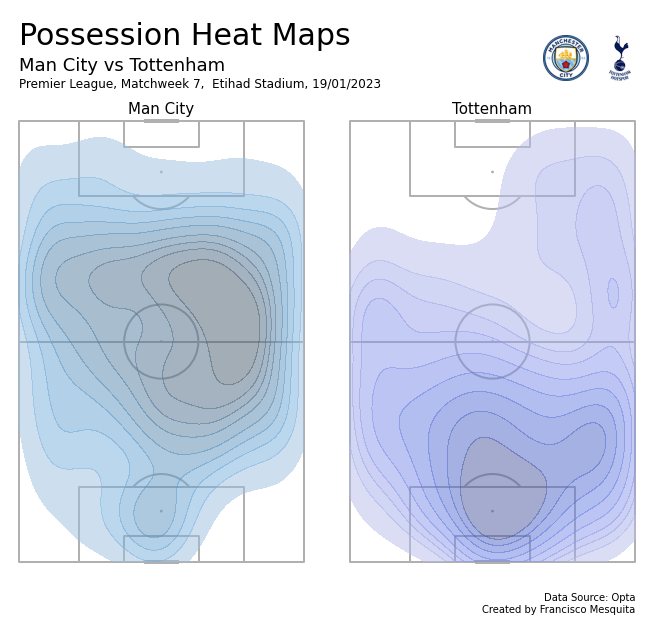

In [6]:
pitch = VerticalPitch(pitch_type = 'opta')
fig, ax = pitch.grid(ncols = 2, axis = False)
fig.set_facecolor("white")

home = touches_df[touches_df.team_name == data['home']['name']]
pitch.kdeplot(home.x, home.y, shade = True, alpha = 0.5, ax = ax['pitch'][0], color = cHome)
ax['pitch'][0].text(50, 103, data['home']['name'], va = 'center', ha = 'center', fontsize = 15)

away = touches_df[touches_df.team_name == data['away']['name']]
pitch.kdeplot(away.x, away.y, shade = True, alpha = 0.5, ax = ax['pitch'][1], color = cAway)
ax['pitch'][1].text(50, 103, data['away']['name'], va = 'center', ha = 'center', fontsize = 15)

ax['title'].text(0, 0.7, 'Possession Heat Maps', va = 'center', ha = 'left', fontsize = 30)
ax['title'].text(0, 0.4, data['home']['name'] + ' vs ' + data['away']['name'], va = 'center', ha = 'left', fontsize = 18)
ax['title'].text(0, 0.2, comp + ', ' + stage + ', ' + venue + ', ' + date, va = 'center', ha = 'left', fontsize = 12)

add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.86, width = 0.07, height = 0.07)
add_image(Image.open(pAway), fig, 
          left = 0.9, bottom = 0.86, width = 0.07, height = 0.07)

ax['endnote'].text(1, 0.6, 'Data Source: Opta', va = 'center', ha = 'right')
ax['endnote'].text(1, 0.3, 'Created by Francisco Mesquita', va = 'center', ha = 'right')

plt.show()

(-0.5, 69.5, 69.5, -0.5)

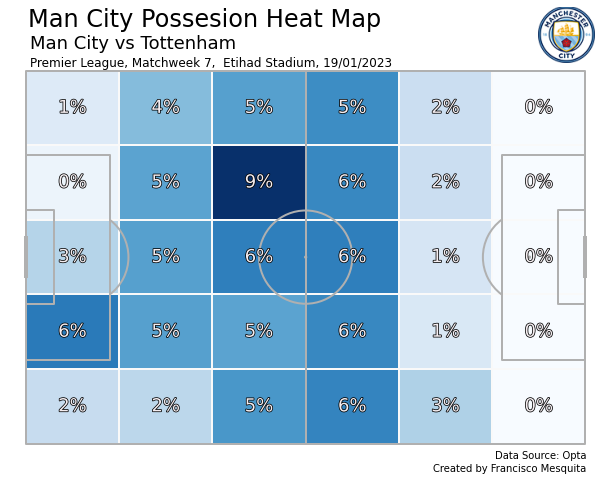

In [7]:
plt.rcParams["figure.figsize"] = [5.00, 1.50]
plt.rcParams["figure.autolayout"] = True

# path effects
path_eff = [path_effects.Stroke(linewidth = 1.5, foreground = 'black'),
            path_effects.Normal()]

pitch = Pitch(pitch_type = 'statsbomb', line_zorder = 2, pitch_color = 'white')
fig, ax = pitch.draw(figsize = (10, 6))
fig.set_facecolor("white")

city = touches_df[touches_df.team_name == data['home']['name']]
#city = touches_df[touches_df.team_name == data['away']['name']]
bin_statistic = pitch.bin_statistic(city.x, city.y, statistic = 'count', bins = (6, 5), normalize = True)
pitch.heatmap(bin_statistic, ax = ax, cmap = 'Blues', edgecolor = '#f9f9f9')
labels = pitch.label_heatmap(bin_statistic, color = '#f4edf0', fontsize = 18,
                             ax = ax, ha = 'center', va = 'center',
                             str_format = '{:.0%}', path_effects = path_eff)

title1 = fig.text(x = 0.36, y = 1.05, s = 'Man City Possesion Heat Map', va = 'center', ha = 'center',
                  size = 24, color = 'black')
title2 = fig.text(x = 0.26, y = .995, s = data['home']['name'] + ' vs ' + data['away']['name'], va = 'center', ha = 'center',
                  size = 18, color = 'black')
title3 = fig.text(x = 0.368, y = .95, s = comp + ', ' + stage + ', ' + venue + ', ' + date, va = 'center', ha = 'center',
                  size = 12, color = 'black')

legend1 = fig.text(.89, 0.04, 'Data Source: Opta', va = 'center', ha = 'right')
legend2 = fig.text(.89, 0.01, 'Created by Francisco Mesquita', va = 'center', ha = 'right')

imHD = plt.imread('mancity.png') # insert local path of the image.
newaxHD = fig.add_axes([0.8, 0.95, 0.1, 0.13], anchor= 'NE', zorder = 1)
newaxHD.imshow(imHD)
newaxHD.axis('off')

# Passing/Possession

In [8]:
pass_data = df[df.type_displayName == 'Pass'].reset_index()
pass_data['team_name'] = pass_data.teamId.apply(lambda x: team_dict[x])
pass_data['player_name'] = pass_data.playerId.apply(lambda x: player_dict[x])

def is_atk_third(data):
    if data.endX > 66.6 and data.x <= 66.6:
        return True
    else:
        return False

def at_atk_third(data):
    if data.x > 66.6 and data.endX > 66.6:
        return True
    else:
        return False

pass_data['to_atk_third'] = pass_data.apply(lambda x: is_atk_third(x), axis=1)
pass_data['at_atk_third'] = pass_data.apply(lambda x: at_atk_third(x), axis=1)

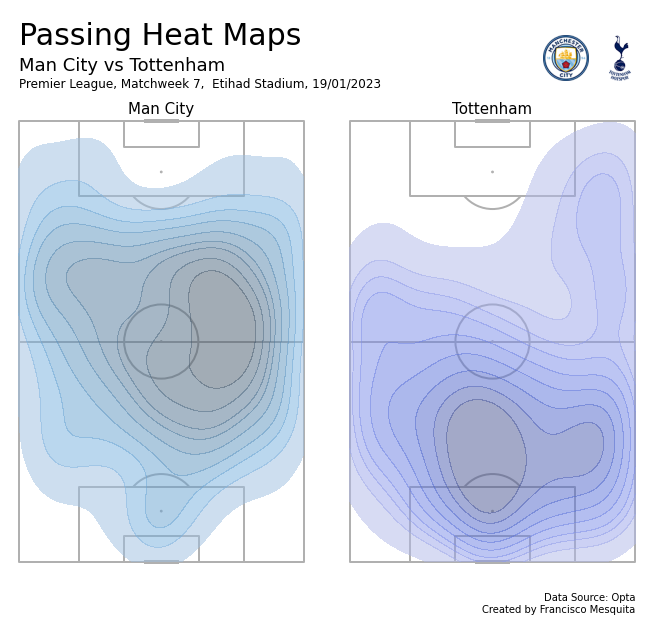

In [9]:
pitch = VerticalPitch(pitch_type = 'opta')
fig, ax = pitch.grid(ncols = 2, axis = False)
fig.set_facecolor("white")

home = pass_data[pass_data.team_name == data['home']['name']]
pitch.kdeplot(home.x, home.y, shade = True, alpha = 0.5, ax = ax['pitch'][0], color = cHome)
ax['pitch'][0].text(50, 103, data['home']['name'], va = 'center', ha = 'center', fontsize = 15)

away = pass_data[pass_data.team_name == data['away']['name']]
pitch.kdeplot(away.x, away.y, shade = True, alpha = 0.5, ax = ax['pitch'][1], color = cAway)
ax['pitch'][1].text(50, 103, data['away']['name'], va = 'center', ha = 'center', fontsize = 15)

ax['title'].text(0, 0.7, 'Passing Heat Maps', va = 'center', ha = 'left', fontsize = 30)
ax['title'].text(0, 0.4, data['home']['name'] + ' vs ' + data['away']['name'], va = 'center', ha = 'left', fontsize = 18)
ax['title'].text(0, 0.2, comp + ', ' + stage + ', ' + venue + ', ' + date, va = 'center', ha = 'left', fontsize = 12)

add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.86, width = 0.07, height = 0.07)
add_image(Image.open(pAway), fig, 
          left = 0.9, bottom = 0.86, width = 0.07, height = 0.07)

ax['endnote'].text(1, 0.6, 'Data Source: Opta', va = 'center', ha = 'right')
ax['endnote'].text(1, 0.3, 'Created by Francisco Mesquita', va = 'center', ha = 'right')

plt.show()

(-0.5, 69.5, 69.5, -0.5)

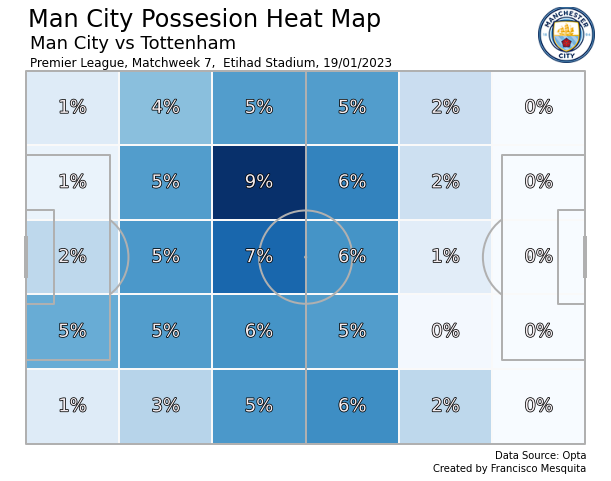

In [10]:
plt.rcParams["figure.figsize"] = [5.00, 1.50]
plt.rcParams["figure.autolayout"] = True

# path effects
path_eff = [path_effects.Stroke(linewidth = 1.5, foreground = 'black'),
            path_effects.Normal()]

city = pass_data[pass_data.team_name == data['home']['name']]
#city = pass_data[pass_data.team_name == data['away']['name']]

pitch = Pitch(pitch_type = 'statsbomb', line_zorder = 2, pitch_color = 'white')
fig, ax = pitch.draw(figsize = (10, 6))
fig.set_facecolor("white")
bin_statistic = pitch.bin_statistic(city.x, city.y, statistic = 'count', bins = (6, 5), normalize = True)
pitch.heatmap(bin_statistic, ax = ax, cmap = 'Blues', edgecolor = '#f9f9f9')
labels = pitch.label_heatmap(bin_statistic, color = '#f4edf0', fontsize = 18,
                             ax = ax, ha = 'center', va = 'center',
                             str_format = '{:.0%}', path_effects = path_eff)

title1 = fig.text(x = 0.36, y = 1.05, s = 'Man City Possesion Heat Map', va = 'center', ha = 'center',
                  size = 24, color = 'black')
title2 = fig.text(x = 0.26, y = .995, s = data['home']['name'] + ' vs ' + data['away']['name'], va = 'center', ha = 'center',
                  size = 18, color = 'black')
title3 = fig.text(x = 0.368, y = .95, s = comp + ', ' + stage + ', ' + venue + ', ' + date, va = 'center', ha = 'center',
                  size = 12, color = 'black')

legend1 = fig.text(.89, 0.04, 'Data Source: Opta', va = 'center', ha = 'right', color = 'black')
legend2 = fig.text(.89, 0.01, 'Created by Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

imHD = plt.imread('mancity.png') # insert local path of the image.
newaxHD = fig.add_axes([0.8, 0.95, 0.1, 0.13], anchor= 'NE', zorder = 1)
newaxHD.imshow(imHD)
newaxHD.axis('off')

Man City had 51 Passes to the Attacking 3rd
Tottenham had 35 Passes to the Attacking 3rd


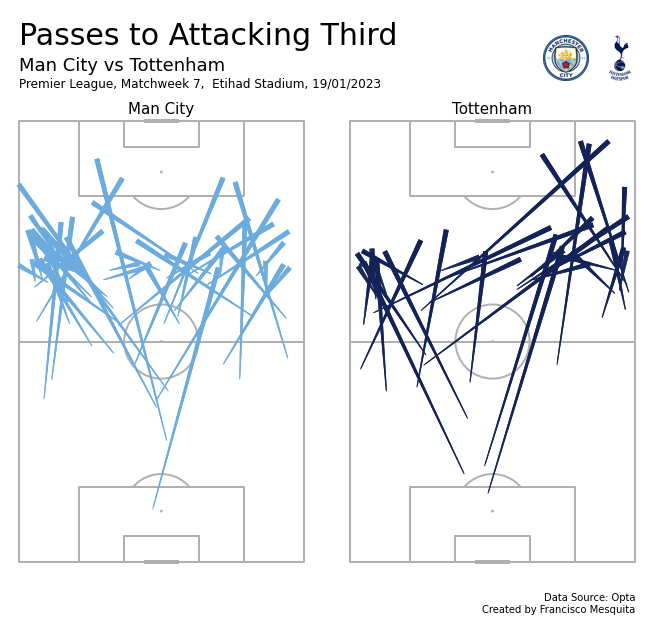

In [11]:
pitch = VerticalPitch(pitch_type = 'opta', half = False)
fig, ax = pitch.grid(ncols = 2, axis = False)
fig.set_facecolor("white")

pass_atk = pass_data[pass_data.to_atk_third == True]

home = pass_atk[pass_atk.team_name == data['home']['name']]
home_Total = home[home.columns[0]].count()
print(data['home']['name'] + ' had ' + str(home_Total) + ' Passes to the Attacking 3rd')
pitch.lines(home.x, home.y, home.endX, home.endY, comet = True, ax = ax['pitch'][0], color = cHome)
ax['pitch'][0].text(50, 103, data['home']['name'], fontsize = 15, va = 'center', ha = 'center', color = 'black')

away = pass_atk[pass_atk.team_name == data['away']['name']]
away_Total = away[away.columns[0]].count()
print(data['away']['name'] + ' had ' + str(away_Total) + ' Passes to the Attacking 3rd')
pitch.lines(away.x, away.y, away.endX, away.endY, comet = True, ax = ax['pitch'][1], color = cAway)
ax['pitch'][1].text(50, 103, data['away']['name'], fontsize = 15, va = 'center', ha = 'center', color = 'black')

ax['title'].text(0, 0.7, 'Passes to Attacking Third', va = 'center', ha = 'left', fontsize = 30, color = 'black')
ax['title'].text(0, 0.4, data['home']['name'] + ' vs ' + data['away']['name'], 
                 va = 'center', ha = 'left', fontsize = 18, color = 'black')
ax['title'].text(0, 0.2, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                 va = 'center', ha = 'left', fontsize = 12, color = 'black')

add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.86, width = 0.07, height = 0.07)
add_image(Image.open(pAway), fig, 
          left = 0.9, bottom = 0.86, width = 0.07, height = 0.07)

ax['endnote'].text(1, 0.6, 'Data Source: Opta', va = 'center', ha = 'right', color = 'black')
ax['endnote'].text(1, 0.3, 'Created by Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

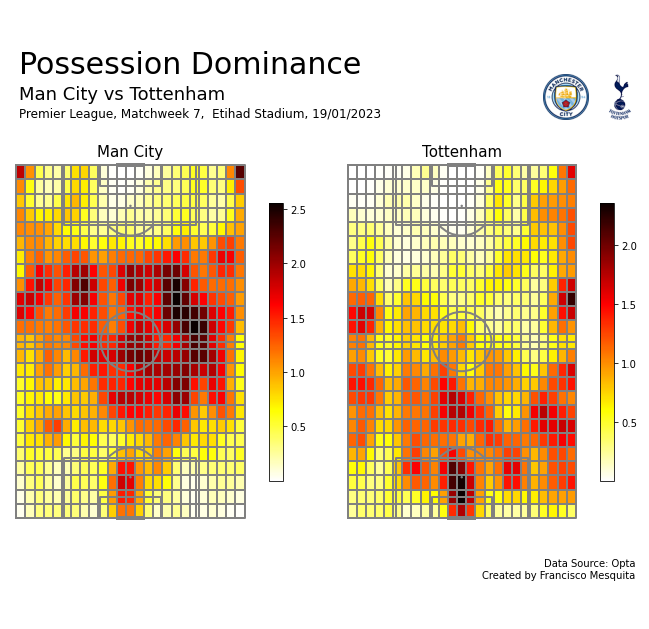

In [12]:
#cmap = ListedColormap(['white', '#', '#FC5C00','#FC3200', '#FC0000'])

pitch = VerticalPitch(pitch_type = 'opta', line_color = 'gray')
fig, ax = pitch.grid(ncols = 2, axis = False)
fig.set_facecolor("white")

# Home Team
home = pass_data[pass_data.team_name == data['home']['name']]
bin_statistic = pitch.bin_statistic(home.x, home.y, statistic = 'count', bins = (25, 25))#, normalize = True)
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)

hm = pitch.heatmap(bin_statistic, ax = ax['pitch'][0], cmap = 'hot_r', edgecolors = 'gray', zorder = 0)
cbar = fig.colorbar(hm, ax = ax['pitch'][0], shrink = 0.6)
ax['pitch'][0].text(50, 104, data['home']['name'], va = 'center', ha = 'center', fontsize = 15, color = 'black')

# Away Team
away = pass_data[pass_data.team_name == data['away']['name']]
bin_statistic = pitch.bin_statistic(away.x, away.y, statistic = 'count', bins = (25, 25))#, normalize = True)
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)

am = pitch.heatmap(bin_statistic, ax = ax['pitch'][1], cmap = 'hot_r', edgecolors = 'gray', zorder = 0)
cbar = fig.colorbar(am, ax = ax['pitch'][1], shrink = 0.6)
ax['pitch'][1].text(50, 104, data['away']['name'], va = 'center', ha = 'center', fontsize = 15, color = 'black')

ax['title'].text(0, 0.4, 'Possession Dominance', va = 'center', ha = 'left', fontsize = 30, color = 'black')
ax['title'].text(0, 0.1, data['home']['name'] + ' vs ' + data['away']['name'], 
                 va = 'center', ha = 'left', fontsize = 18, color = 'black')
ax['title'].text(0, -0.1, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                 va = 'center', ha = 'left', fontsize = 12, color = 'black')

# Home
add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.8, width = 0.07, height = 0.07)
# Away
add_image(Image.open(pAway), fig, 
          left = 0.9, bottom = 0.8, width = 0.07, height = 0.07)

ax['endnote'].text(1, 1.4, 'Data Source: Opta', va = 'center', ha = 'right', color = 'black')
ax['endnote'].text(1, 1.1, 'Created by Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

# Average Position

In [13]:
avg_pos = pass_data[['team_name', 'player_name', 'minute', 'x', 'y', 'endX', 'endY']].groupby(
    ['team_name', 'player_name']).agg({'minute': [np.max, np.min], 'x': np.mean, 'y': np.mean}).reset_index().reset_index()
avg_pos.columns = [' '.join(col).strip() for col in avg_pos.columns.values]
avg_pos['mins_played'] = avg_pos['minute amax'] - avg_pos['minute amin']

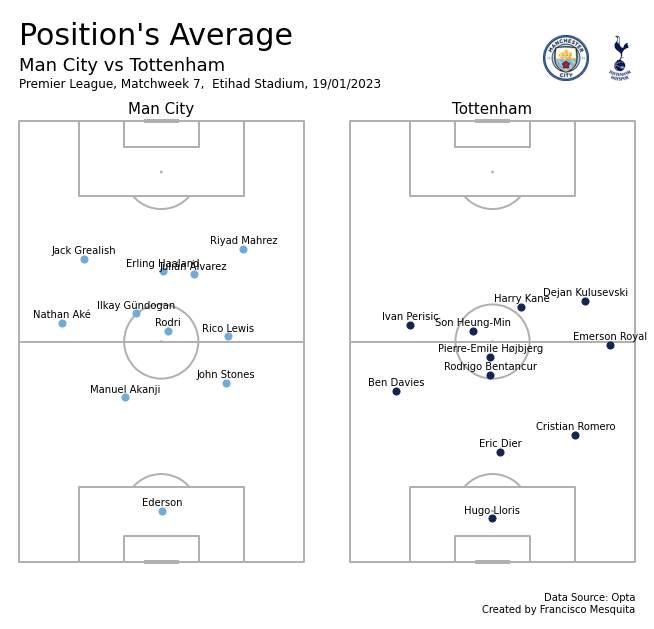

In [14]:
pitch = VerticalPitch(pitch_type = 'opta')
fig, ax = pitch.grid(ncols = 2, axis = False)
fig.set_facecolor("white")

home = avg_pos[avg_pos.team_name == data['home']['name']]
home = home.sort_values('mins_played', ascending = False).iloc[:11, :]
pitch.scatter(home['x mean'], home['y mean'], s = 50, ax = ax['pitch'][0], color = cHome)
ax['pitch'][0].text(50, 103, data['home']['name'], va = 'center', ha = 'center', fontsize = 15, color = 'black')

for i, d in home.iterrows():
    pitch.annotate(d['player_name'], (d['x mean'] + 2, d['y mean']), 
                   va = 'center', ha = 'center', ax = ax['pitch'][0], color = 'black')

away = avg_pos[avg_pos.team_name == data['away']['name']]
away = away.sort_values('mins_played', ascending = False).iloc[:11, :]
pitch.scatter(away['x mean'], away['y mean'], s = 50, ax = ax['pitch'][1], color = cAway)
ax['pitch'][1].text(50, 103, data['away']['name'], va = 'center', ha = 'center', fontsize = 15, color = 'black')

for i, d in away.iterrows():
    pitch.annotate(d['player_name'], (d['x mean'] + 2, d['y mean']), 
                   va = 'center', ha = 'center', ax = ax['pitch'][1], color = 'black')

ax['title'].text(0, 0.7, 'Position\'s Average', va = 'center', ha = 'left', fontsize = 30, color = 'black')
ax['title'].text(0, 0.4, data['home']['name'] + ' vs ' + data['away']['name'], 
                 va = 'center', ha = 'left', fontsize = 18, color = 'black')
ax['title'].text(0, 0.2, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                 va = 'center', ha = 'left', fontsize = 12, color = 'black')

add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.86, width = 0.07, height = 0.07)
add_image(Image.open(pAway), fig, 
          left = 0.9, bottom = 0.86, width = 0.07, height = 0.07)

ax['endnote'].text(1, 0.6, 'Data Source: Opta', va = 'center', ha = 'right', color = 'black')
ax['endnote'].text(1, 0.3, 'Created by Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

# Passing Network

In [15]:
team = pass_data.team_name.values.tolist()
passer = pass_data.player_name.values.tolist()
receiver = pass_data.player_name.shift(-1).tolist()
team_receiver = pass_data.team_name.shift(-1).tolist()
pass_outcome = pass_data.outcomeType_displayName.values.tolist()
x = pass_data.x.values.tolist()
y = pass_data.y.values.tolist()

pass_net_df = pd.DataFrame({
    'team': team,
    'team_receiver': team_receiver,
    'passer': passer,
    'receiver': receiver,
    'pass_outcome': pass_outcome,
    'x': x,
    'y': y
})

pass_net_df = pass_net_df[pass_net_df.pass_outcome == 'Successful']
pass_net_df = pass_net_df[pass_net_df.team == pass_net_df.team_receiver]
pass_net_df['id'] = pass_net_df['passer'] + pass_net_df['receiver']

pass_pair_df = pass_net_df[['passer', 'receiver', 'pass_outcome']].groupby(['passer', 'receiver']).count().reset_index()
pass_pair_df['id'] = pass_pair_df['passer'] + pass_pair_df['receiver']
pass_pair_df = pass_pair_df.sort_values('pass_outcome', ascending = False)

pass_pair_df.head()

# Retrieve Top 11 Players
top_11_home = avg_pos[avg_pos.team_name == data['home']['name']].sort_values('mins_played', 
                ascending = False).player_name.tolist()[:11]
top_11_away = avg_pos[avg_pos.team_name == data['away']['name']].sort_values('mins_played', 
                ascending = False).player_name.tolist()[:11]

# Filter the data
avg_pos_11 = avg_pos[avg_pos.player_name.isin(top_11_home + top_11_away)].reset_index(drop = True)
avg_pos_11 = avg_pos_11.drop(['index', 'minute amax', 'minute amin', 'mins_played'], axis = 1)

pass_merge = pass_pair_df.merge(avg_pos_11, left_on = 'passer', right_on = 'player_name',)
pass_merge = pass_merge.rename({'x mean': 'x', 'y mean': 'y'}, axis = 'columns')
pass_merge = pass_merge.merge(avg_pos_11, left_on = 'receiver', right_on = 'player_name',)
pass_merge = pass_merge.rename({'x mean': 'x_end', 'y mean': 'y_end'}, axis = 'columns')
pass_merge = pass_merge.drop(['player_name_x', 'team_name_y', 'id', 'player_name_y'], axis = 1)
pass_merge = pass_merge.rename({'team_name_x': 'team_name'}, axis = 'columns')

In [16]:
pass_pair_df.head(15)

,passer,receiver,pass_outcome,id
149,Nathan Aké,Jack Grealish,24,Nathan AkéJack Grealish
196,Rodri,Nathan Aké,20,RodriNathan Aké
175,Rico Lewis,John Stones,17,Rico LewisJohn Stones
197,Rodri,Rico Lewis,16,RodriRico Lewis
178,Rico Lewis,Rodri,16,Rico LewisRodri
192,Rodri,John Stones,15,RodriJohn Stones
188,Riyad Mahrez,Rodri,15,Riyad MahrezRodri
141,Manuel Akanji,John Stones,14,Manuel AkanjiJohn Stones
155,Nathan Aké,Rodri,14,Nathan AkéRodri
190,Rodri,Ilkay Gündogan,12,RodriIlkay Gündogan


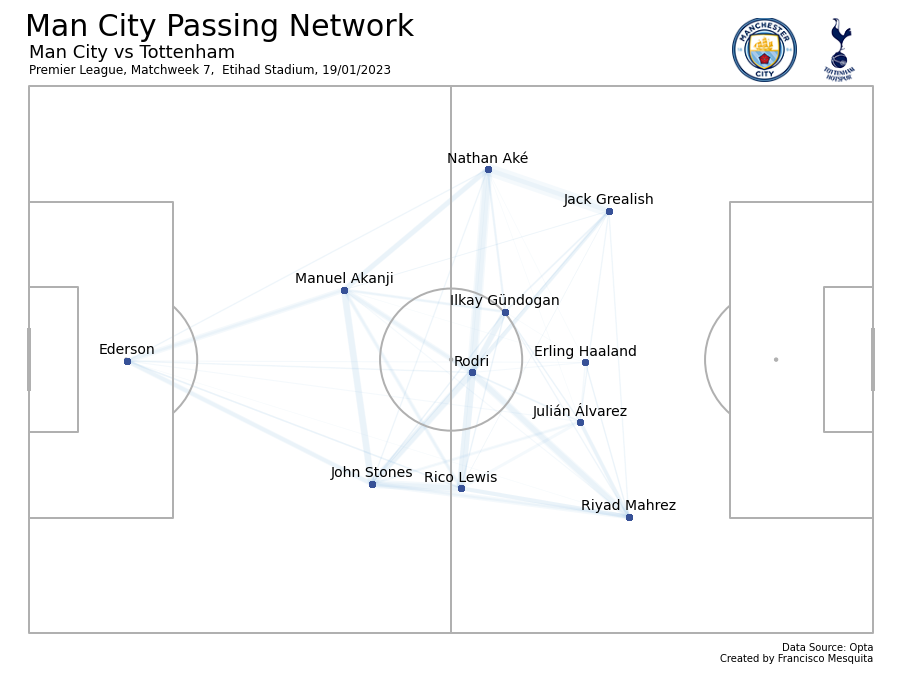

In [17]:
pitch = Pitch(pitch_type = 'opta')

fig, ax = pitch.grid(figheight = 10, title_height = 0.08, endnote_space = 0, axis = False, 
                      title_space = 0, grid_height = 0.82, endnote_height = 0.05)

fig.set_facecolor("white")

city = pass_merge[pass_merge.team_name == data['home']['name']]
#city = pass_merge[pass_merge.team_name == data['away']['name']]

pitch.lines(city.x, city.y, city.x_end, city.y_end, color = cHome, 
            linewidth = city.pass_outcome * 0.5, alpha = 0.07, 
            zorder = 0, ax = ax['pitch'])
pitch.scatter(city.x, city.y, color = '#375197', ax = ax['pitch'])

for i, d in city[['passer', 'x', 'y']].drop_duplicates().iterrows():
    pitch.annotate(d.passer, (d.x, d.y + 2.), ax = ax['pitch'], va = 'center', ha = 'center', size = 14, color = 'black')

ax['title'].text(-.005, 0.65, 'Man City Passing Network', va = 'center', ha = 'left', fontsize = 30, color = 'black')
ax['title'].text(0, 0.2, data['home']['name'] + ' vs ' + data['away']['name'], 
                 va = 'center', ha = 'left', fontsize = 18, color = 'black')
ax['title'].text(0, -0.1, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                 va = 'center', ha ='left', fontsize = 12, color = 'black')

add_image(Image.open(pHome), fig, 
          left = 0.8, bottom = 0.87, width = 0.07, height = 0.09)
add_image(Image.open(pAway), fig, 
          left = 0.88, bottom = 0.87, width = 0.07, height = 0.09)

ax['endnote'].text(1, 1.2, 'Data Source: Opta', va = 'center', ha = 'right', color = 'black')
ax['endnote'].text(1, 0.9, 'Created by Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

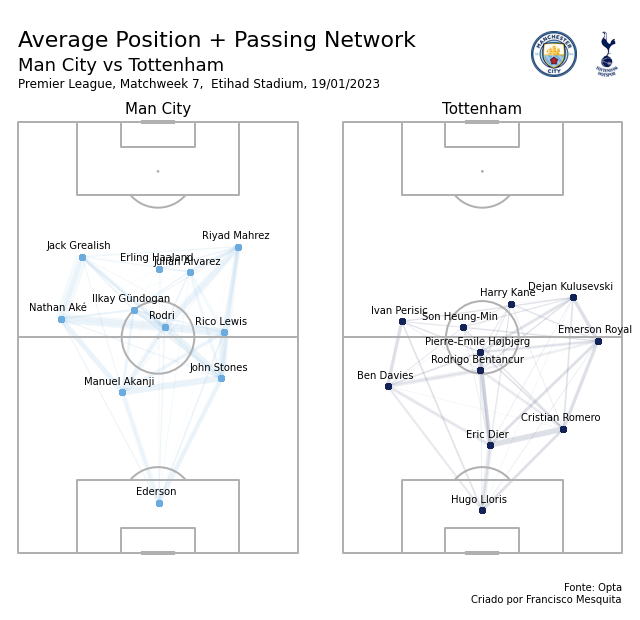

In [18]:
 pitch = VerticalPitch(pitch_type = 'opta')
fig, ax = pitch.grid(ncols = 2, axis = False, grid_height = .7)
fig.set_facecolor("white")


home = pass_merge[pass_merge.team_name == data['home']['name']]
away = pass_merge[pass_merge.team_name == data['away']['name']]

pitch.lines(home.x, home.y, home.x_end, home.y_end, color = cHome, 
            linewidth = home.pass_outcome * 0.5, alpha = 0.07, 
            zorder = 0, ax = ax['pitch'][0])
pitch.scatter(home.x, home.y, color = cHome, ax = ax['pitch'][0])
ax['pitch'][0].text(50, 103, data['home']['name'], va = 'center', ha = 'center', fontsize = 15, color = 'black')

pitch.lines(away.x, away.y, away.x_end, away.y_end, color = cAway, 
            linewidth = away.pass_outcome * 0.5, alpha = 0.07, 
            zorder = 0, ax = ax['pitch'][1])
pitch.scatter(away.x, away.y, color = cAway, ax = ax['pitch'][1])
ax['pitch'][1].text(50, 103, data['away']['name'], va = 'center', ha = 'center', fontsize = 15, color = 'black')

for i, d in home[['passer', 'x', 'y']].drop_duplicates().iterrows():
    pitch.annotate(d.passer, (d.x + 2.5, d.y + 1), ax = ax['pitch'][0], 
                   va = 'center', ha = 'center', size = 10, color = 'black')
for i, d in away[['passer', 'x', 'y']].drop_duplicates().iterrows():
    pitch.annotate(d.passer, (d.x + 2.5, d.y + 1), ax = ax['pitch'][1], 
                   va = 'center', ha = 'center', size = 10, color = 'black')

ax['title'].text(0, 0.65, 'Average Position + Passing Network', va = 'center', ha = 'left', fontsize = 22, color = 'black')
ax['title'].text(0, 0.4, data['home']['name'] + ' vs ' + data['away']['name'], 
                 va = 'center', ha = 'left', fontsize = 18, color = 'black')
ax['title'].text(0, 0.2, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                 va = 'center', ha = 'left', fontsize = 12, color = 'black')

add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.86, width = 0.07, height = 0.07)
add_image(Image.open(pAway), fig, 
          left = 0.9, bottom = 0.86, width = 0.07, height = 0.07)

ax['endnote'].text(1, 0.6, 'Fonte: Opta', va = 'center', ha = 'right', color = 'black')
ax['endnote'].text(1, 0.3, 'Criado por Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

# Progressive Passes

In [19]:
pass_data['begin'] = pass_data.apply(lambda x: np.sqrt((100 - x['x']) ** 2 + (50 - x['y'])), axis = 1)
pass_data['end'] = pass_data.apply(lambda x: np.sqrt((100 - x['endX']) ** 2 + (50 - x['endY'])), axis = 1)
pass_data['progressive'] = pass_data.apply(lambda x: True if x.end / x.begin < .75 else False, axis = 1)

pass_prog = pass_data[pass_data.progressive == True]
home = pass_prog[pass_prog.team_name == data['home']['name']]
home_Total = home[home.columns[0]].count()
print(data['home']['name'] + ' had ' + str(home_Total) + ' Progressive Passes')
home_succ = home[home.outcomeType_displayName == 'Successful']

away = pass_prog[pass_prog.team_name == data['away']['name']]
away_Total = away[away.columns[0]].count()
print(data['away']['name'] + ' had ' + str(away_Total) + ' Progressive Passes')
away_succ = away[away.outcomeType_displayName == 'Successful']

Man City had 103 Progressive Passes
Tottenham had 76 Progressive Passes


Man City had 64 Successfull Progressive Passes
Tottenham had 41 Successfull Progressive Passes


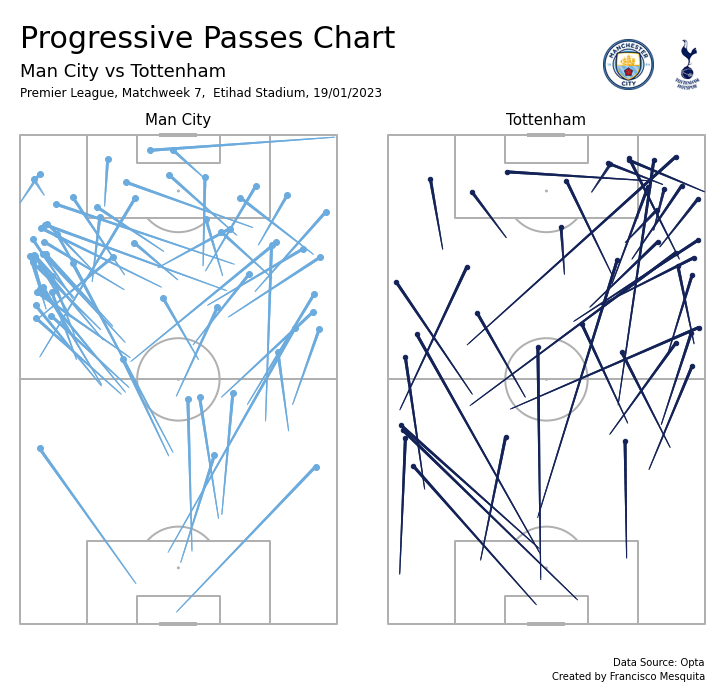

In [20]:
pitch = VerticalPitch(pitch_type = 'opta', line_zorder = 0)
fig, ax = pitch.grid(ncols = 2, axis = False, figheight = 10)
fig.set_facecolor("white")

home = pass_prog[pass_prog.team_name == data['home']['name']]
home_succ = home[home.outcomeType_displayName == 'Successful']
home_succ_Total = home_succ[home_succ.columns[0]].count()
print(data['home']['name'] + ' had ' + str(home_succ_Total) + ' Successfull Progressive Passes')

pitch.lines(home_succ.x, home_succ.y, home_succ.endX, home_succ.endY, 
            comet = True, linewidth = 3, ax = ax['pitch'][0], color = cHome)
pitch.scatter(home_succ.endX, home_succ.endY, ax = ax['pitch'][0], color = cHome)
ax['pitch'][0].text(50, 103, data['home']['name'], va = 'center', ha = 'center', fontsize = 15, color = 'black')

away = pass_prog[pass_prog.team_name == data['away']['name']]
away_succ = away[away.outcomeType_displayName == 'Successful']
away_succ_Total = away_succ[away_succ.columns[0]].count()
print(data['away']['name'] + ' had ' + str(away_succ_Total) + ' Successfull Progressive Passes')

pitch.lines(away_succ.x, away_succ.y, away_succ.endX, away_succ.endY, 
            comet = True, linewidth = 3, ax = ax['pitch'][1], color = cAway)
pitch.scatter(away_succ.endX, away_succ.endY, s = 20, ax = ax['pitch'][1], color = cAway)
ax['pitch'][1].text(50, 103, data['away']['name'], va = 'center', ha = 'center', fontsize = 15, color = 'black')

ax['title'].text(0, 0.7, 'Progressive Passes Chart', va = 'center', ha = 'left', fontsize = 30, color = 'black')
ax['title'].text(0, 0.4, data['home']['name'] + ' vs ' + data['away']['name'], 
                 va = 'center', ha = 'left', fontsize = 18, color = 'black')
ax['title'].text(0, 0.2, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                 va = 'center', ha = 'left', fontsize = 12, color = 'black')

add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.86, width = 0.07, height = 0.07)
add_image(Image.open(pAway), fig, 
          left = 0.9, bottom = 0.86, width = 0.07, height = 0.07)

ax['endnote'].text(1, 0.6, 'Data Source: Opta', va = 'center', ha = 'right', color = 'black')
ax['endnote'].text(1, 0.3, 'Created by Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

# Pass Flow


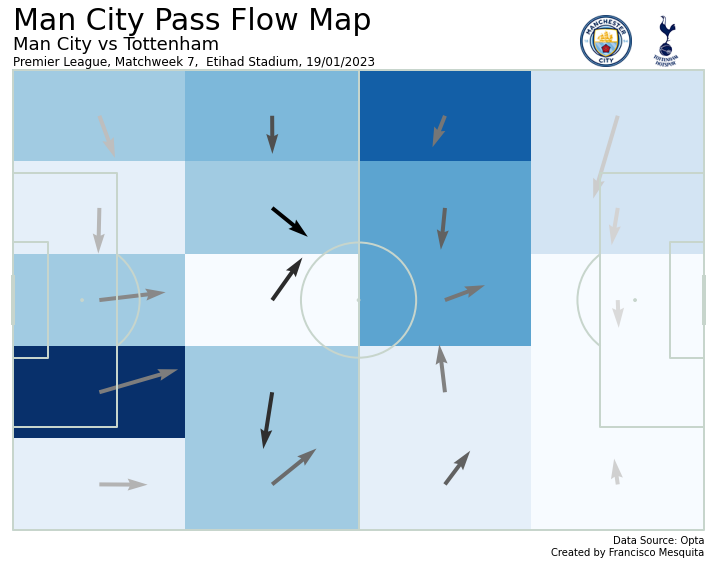

In [21]:
pitch = Pitch(pitch_type = 'statsbomb', pad_bottom = 1, pad_top = 1, pad_left = 1, pad_right = 1,
              line_zorder = 2, line_color = '#c7d5cc', pitch_color = 'white')
fig, axs = pitch.grid(figheight = 8, endnote_height = 0.03, endnote_space = 0,
                      title_height = 0.1, title_space = 0, grid_height = 0.82,
                      axis = False)

city = pass_data[pass_data.team_name == data['home']['name']]
#city = pass_data[pass_data.team_name == data['away']['name']]

bins = (4, 5)

# plot the heatmap - darker colors = more passes originating from that square
bs_heatmap = pitch.bin_statistic(away.x, away.y, statistic = 'count', bins = bins)
hm = pitch.heatmap(bs_heatmap, ax = axs['pitch'], cmap = 'Blues')
grey = LinearSegmentedColormap.from_list('custom cmap', ['#DADADA', 'black'])
fm = pitch.flow(city.x, city.y, city.endX, city.endY,
                cmap = grey, arrow_type = 'scale', arrow_length = 15, bins = bins, ax = axs['pitch'])

axs['title'].text(0, 0.75, 'Man City Pass Flow Map', va = 'center', ha = 'left', fontsize = 30, color = 'black')
axs['title'].text(0, 0.35, data['home']['name'] + ' vs ' + data['away']['name'], 
                  va = 'center', ha = 'left', fontsize = 18, color = 'black')
axs['title'].text(0, 0.05, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                  va = 'center', ha ='left', fontsize = 12, color = 'black')

add_image(Image.open(pHome), fig, left = 0.8, bottom = 0.87, width = 0.07, height = 0.09)
add_image(Image.open(pAway), fig, left = 0.88, bottom = 0.87, width = 0.07, height = 0.09)

axs['endnote'].text(1, .8, 'Data Source: Opta', va = 'center', ha = 'right', color = 'black')
axs['endnote'].text(1, 0.1, 'Created by Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

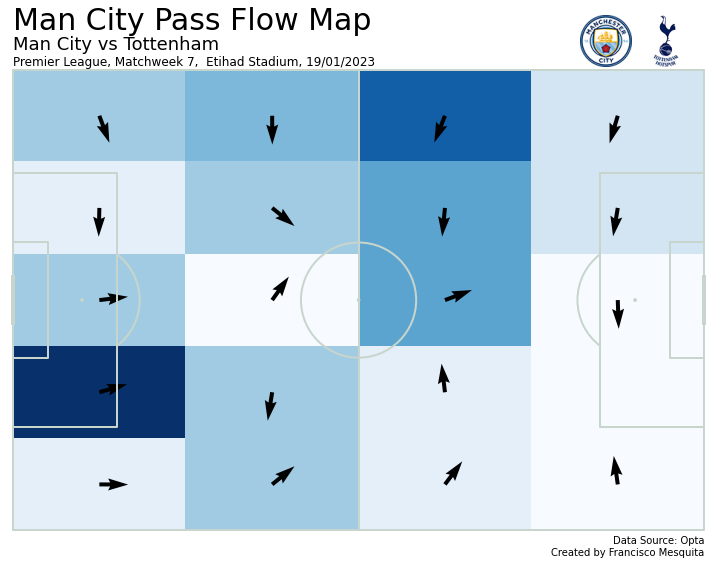

In [22]:
pitch = Pitch(pitch_type = 'statsbomb', pad_bottom = 1, pad_top = 1, pad_left = 1, pad_right = 1,
              line_zorder = 2, line_color = '#c7d5cc', pitch_color = 'white')
fig, axs = pitch.grid(figheight = 8, endnote_height = 0.03, endnote_space = 0,
                      title_height = 0.1, title_space = 0, grid_height = 0.82,
                      axis = False)

city = pass_data[pass_data.team_name == data['home']['name']]
#city = pass_data[pass_data.team_name == data['away']['name']]

bins = (4, 5)

# plot the heatmap - darker colors = more passes originating from that square
bs_heatmap = pitch.bin_statistic(away.x, away.y, statistic = 'count', bins = bins)
hm = pitch.heatmap(bs_heatmap, ax = axs['pitch'], cmap = 'Blues')
fm = pitch.flow(city.x, city.y, city.endX, city.endY,
                color = 'black', arrow_type = 'same', arrow_length = 5, bins = bins, ax = axs['pitch'])

axs['title'].text(0, 0.75, 'Man City Pass Flow Map', va = 'center', ha = 'left', fontsize = 30, color = 'black')
axs['title'].text(0, 0.35, data['home']['name'] + ' vs ' + data['away']['name'], 
                  va = 'center', ha = 'left', fontsize = 18, color = 'black')
axs['title'].text(0, 0.05, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                  va = 'center', ha ='left', fontsize = 12, color = 'black')

add_image(Image.open(pHome), fig, 
          left = 0.8, bottom = 0.87, width = 0.07, height = 0.09)
add_image(Image.open(pAway), fig, 
          left = 0.88, bottom = 0.87, width = 0.07, height = 0.09)

axs['endnote'].text(1, .8, 'Data Source: Opta', va = 'center', ha = 'right', color = 'black')
axs['endnote'].text(1, 0.1, 'Created by Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

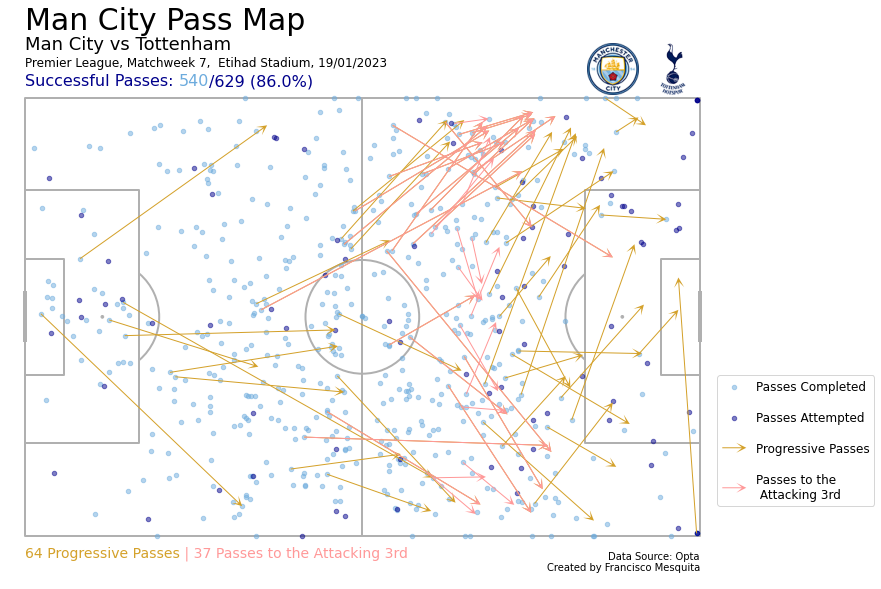

In [23]:
pitch = Pitch(pitch_type = 'opta')
fig, ax = pitch.grid(figheight = 8, title_height = 0.08, endnote_space = 0, axis = False, 
                      title_space = 0, grid_height = 0.82, endnote_height = 0.05)
fig.set_facecolor("white")

city = pass_data[pass_data.team_name == data['home']['name']]
#city = pass_data[pass_data.team_name == data['away']['name']]
pass_succ = city[city.outcomeType_displayName == 'Successful']
pass_fail = city[city.outcomeType_displayName == 'Unsuccessful']

pass_succ_total = pass_succ[pass_succ.columns[0]].count() #number of successful passes
pass_fail_total = pass_fail[pass_fail.columns[0]].count() #number of unsuccessful passes
pass_total = pass_succ_total + pass_fail_total #number of total passes
pass_total_perc = round(100 * pass_succ_total/pass_total, 0)

prog = pass_prog[pass_prog.team_name == data['home']['name']]
#prog = pass_prog[pass_prog.team_name == data['away']['name']]
prog_succ = prog[prog.outcomeType_displayName == 'Successful']
prog_succ_Total = prog_succ[prog_succ.columns[0]].count()

atk3rd = pass_atk[pass_atk.team_name == data['home']['name']]
#atk3rd = pass_atk[pass_atk.team_name == data['away']['name']]
atk3rd_succ = atk3rd[atk3rd.outcomeType_displayName == 'Successful']
atk3rd_succ_Total = atk3rd_succ[atk3rd_succ.columns[0]].count()

pitch.scatter(pass_succ.x, pass_succ.y, s = 20, ax = ax['pitch'], color = cHome, alpha = 0.5, label = 'Passes Completed')
pitch.scatter(pass_fail.x, pass_fail.y, s = 20, ax = ax['pitch'], color = '#00008b', alpha = 0.5, label = 'Passes Attempted')
pitch.arrows(prog_succ.x, prog_succ.y, prog_succ.endX, prog_succ.endY, width = 1, headwidth = 10, headlength = 10, 
             color = '#D4A12A', ax = ax['pitch'], label = 'Progressive Passes')
pitch.arrows(atk3rd_succ.x, atk3rd_succ.y, atk3rd_succ.endX, atk3rd_succ.endY, width = 1, headwidth = 10, headlength = 10, 
             color = '#FF9999', ax = ax['pitch'], label = 'Passes to the \n Attacking 3rd')

# add a legend and title
legend = ax['pitch'].legend(loc = (1.,.1), labelspacing = 1.5, fontsize = 12, labelcolor = 'black')

ax['title'].text(0, 1.3, 'Man City Pass Map', va = 'center', ha = 'left', fontsize = 30, color = 'black')
ax['title'].text(0, .8, data['home']['name'] + ' vs ' + data['away']['name'], 
                 va = 'center', ha = 'left', fontsize = 18, color = 'black')
ax['title'].text(0, 0.4, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                 va = 'center', ha = 'left', fontsize = 12, color = 'black')
ax['title'].text(0, 0.0, 'Successful Passes: ', va = 'center', ha = 'left', fontsize = 16, color = '#00008b')
ax['title'].text(0.228, 0.0, str(pass_succ_total), va = 'center', ha = 'left', fontsize = 16, color = cHome)
ax['title'].text(0.273, 0.0, '/' + str(pass_total) + ' (' + str(pass_total_perc) + '%)', 
                 va = 'center', ha = 'left', fontsize = 16, color = '#00008b')
#ax['title'].text(0, 0.0, 'Successful Passes: ' + str(pass_succ_total) + '/' + str(pass_total) + ' (' 
#                 + str(pass_total_perc) + '%), va = 'center', ha = 'left', fontsize = 16, color = 'pink')
ax['endnote'].text(0., 1., str(prog_succ_Total) + ' Progressive Passes', 
                 va = 'center', ha = 'left', fontsize = 14, color = '#D4A12A')
ax['endnote'].text(0.23, 1., ' | ' + str(atk3rd_succ_Total) + ' Passes to the Attacking 3rd', 
                 va = 'center', ha = 'left', fontsize = 14, color = '#FF9999')
#ax['endnote'].text(0, 1., str(prog_succ_Total) + ' Progressive Passes' + ' | ' + str(atk3rd_succ_Total) 
#                   + ' Passes to the Attacking 3rd', va = 'center', ha = 'left', fontsize = 14, color = 'pink')

add_image(Image.open(pHome), fig, 
          left = 0.8, bottom = 0.87, width = 0.07, height = 0.09)
add_image(Image.open(pAway), fig, 
          left = 0.88, bottom = 0.87, width = 0.07, height = 0.09)

ax['endnote'].text(1, 0.9, 'Data Source: Opta', va = 'center', ha = 'right', color = 'black')
ax['endnote'].text(1, 0.5, 'Created by Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

# Defensive Actions

In [24]:
df_def = df[df.type_displayName.isin(['Clearance', 'Interception', 'BlockedPass', 'Tackle', 'BallRecovery', 'Aerial'])]
df_def['team_name'] = df_def.teamId.apply(lambda x: team_dict[x])
df_def['player_name'] = df_def.playerId.apply(lambda x: player_dict[x])

In [25]:
Clearance = df[df.type_displayName == 'Clearance'].reset_index()
Clearance['team_name'] = Clearance.teamId.apply(lambda x: team_dict[x])
Clearance['player_name'] = Clearance.playerId.apply(lambda x: player_dict[x])
Clearance = Clearance[Clearance.outcomeType_displayName == 'Successful']
Clearance = Clearance[Clearance.team_name == 'Man City']
Clear_Total = Clearance[Clearance.columns[0]].count()
print(str(Clear_Total) + ' Clearances')

Interception = df[df.type_displayName == 'Interception'].reset_index()
Interception['team_name'] = Interception.teamId.apply(lambda x: team_dict[x])
Interception['player_name'] = Interception.playerId.apply(lambda x: player_dict[x])
Interception = Interception[Interception.outcomeType_displayName == 'Successful']
Interception = Interception[Interception.team_name == 'Man City']
Intercep_Total = Interception[Interception.columns[0]].count()
print(str(Intercep_Total) + ' Interceptions')

BlockedPass = df[df.type_displayName == 'BlockedPass'].reset_index()
BlockedPass['team_name'] = BlockedPass.teamId.apply(lambda x: team_dict[x])
BlockedPass['player_name'] = BlockedPass.playerId.apply(lambda x: player_dict[x])
BlockedPass = BlockedPass[BlockedPass.outcomeType_displayName == 'Successful']
BlockedPass = BlockedPass[BlockedPass.team_name == 'Man City']
BlockPass_Total = BlockedPass[BlockedPass.columns[0]].count()
print(str(BlockPass_Total) + ' Blocked Passes')

Tackle = df[df.type_displayName == 'Tackle'].reset_index()
Tackle['team_name'] = Tackle.teamId.apply(lambda x: team_dict[x])
Tackle['player_name'] = Tackle.playerId.apply(lambda x: player_dict[x])
Tackle = Tackle[Tackle.outcomeType_displayName == 'Successful']
Tackle = Tackle[Tackle.team_name == 'Man City']
Tackle_Total = Tackle[Tackle.columns[0]].count()
print(str(Tackle_Total) + ' Tackles')

BallRecovery = df[df.type_displayName == 'BallRecovery'].reset_index()
BallRecovery['team_name'] = BallRecovery.teamId.apply(lambda x: team_dict[x])
BallRecovery['player_name'] = BallRecovery.playerId.apply(lambda x: player_dict[x])
BallRecovery = BallRecovery[BallRecovery.outcomeType_displayName == 'Successful']
BallRecovery = BallRecovery[BallRecovery.team_name == 'Man City']
BallRecover_Total = BallRecovery[BallRecovery.columns[0]].count()
print(str(BallRecover_Total) + ' Ball Recoveries')

Aerial = df[df.type_displayName == 'Aerial'].reset_index()
AerialWon = Aerial[Aerial.outcomeType_displayName == 'Successful']
AerialWon['team_name'] = AerialWon.teamId.apply(lambda x: team_dict[x])
AerialWon['player_name'] = AerialWon.playerId.apply(lambda x: player_dict[x])
AerialWon = AerialWon[AerialWon.outcomeType_displayName == 'Successful']
AerialWon = AerialWon[AerialWon.team_name == 'Man City']
AerialWon_Total = AerialWon[AerialWon.columns[0]].count()
print(str(AerialWon_Total) + ' Aerial Duels Won')

13 Clearances
8 Interceptions
10 Blocked Passes
11 Tackles
47 Ball Recoveries
11 Aerial Duels Won


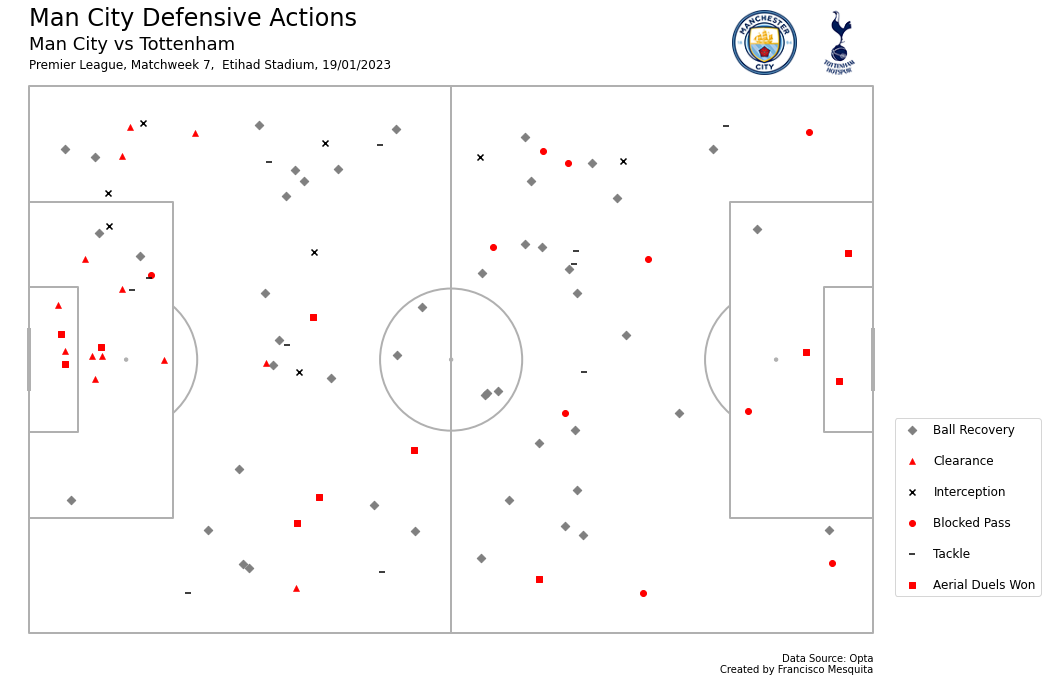

In [26]:
pitch = Pitch(pitch_type = 'opta')
fig, axs = pitch.grid(figheight = 10, title_height = 0.08, endnote_space = 0, axis = False, 
                      title_space = 0, grid_height = 0.82, endnote_height = 0.05)
fig.set_facecolor("white")

pitch.scatter(BallRecovery.x, BallRecovery.y, c = 'grey', edgecolors = 'grey',
              marker = 'D', ax = axs['pitch'], zorder = 2, label = 'Ball Recovery')

pitch.scatter(Clearance.x, Clearance.y, edgecolors = 'red', linewidth = 0.6, c = 'red', 
             marker = '^', ax = axs['pitch'], zorder = 2, label = 'Clearance')

pitch.scatter(Interception.x, Interception.y, c = 'black', edgecolors = 'black',
              marker = 'x', ax = axs['pitch'], zorder = 2, label = 'Interception')

pitch.scatter(BlockedPass.x, BlockedPass.y, c = 'red', edgecolors = 'red',
              marker = 'o', ax = axs['pitch'], zorder = 2, label = 'Blocked Pass')

pitch.scatter(Tackle.x, Tackle.y, c = 'black', edgecolors = 'black',
              marker = '_', ax = axs['pitch'], zorder = 2, label = 'Tackle')

pitch.scatter(AerialWon.x, AerialWon.y, c = 'red', edgecolors = 'red',
              marker = 's', ax = axs['pitch'], zorder = 2, label = 'Aerial Duels Won')

axs['title'].text(0, 0.8, 'Man City Defensive Actions', va = 'center', ha = 'left', fontsize = 24, color = 'black')
axs['title'].text(0, 0.35, data['home']['name'] + ' vs ' + data['away']['name'], 
                  va = 'center', ha = 'left', fontsize = 18, color = 'black')
axs['title'].text(0, 0., comp + ', ' + stage + ', ' + venue + ', ' + date, 
                  va = 'center', ha = 'left', fontsize = 12, color = 'black')

# add a legend and title
legend = axs['pitch'].legend(loc = (1.,.1), labelspacing = 1.5, fontsize = 12, labelcolor = 'black')

add_image(Image.open(pHome), fig, 
          left = 0.8, bottom = 0.88, width = 0.07, height = 0.09)
add_image(Image.open(pAway), fig, 
          left = 0.88, bottom = 0.88, width = 0.07, height = 0.09)

axs['endnote'].text(1, 0.9, 'Data Source: Opta', va = 'center', ha = 'right', color = 'black')
axs['endnote'].text(1, 0.6, 'Created by Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

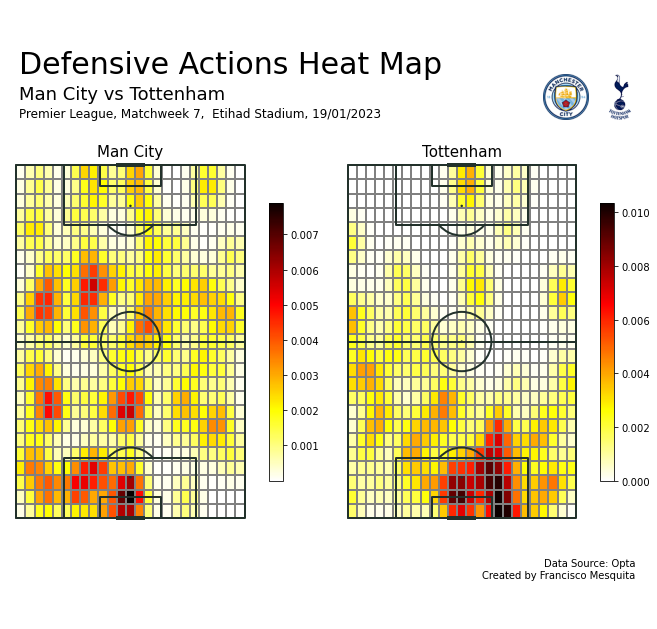

In [27]:
pitch = VerticalPitch(pitch_type= 'opta', line_color = '#22312b')
fig, ax = pitch.grid(ncols = 2, axis = False,)
fig.set_facecolor("white")

# Home Team
home = df_def[df_def.team_name == data['home']['name']]
bin_statistic = pitch.bin_statistic(home.x, home.y, statistic= 'count', bins = (25, 25), normalize = True)
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)

hm = pitch.heatmap(bin_statistic, ax = ax['pitch'][0], cmap = 'hot_r', edgecolors = 'gray', zorder = 0)
cbar = fig.colorbar(hm, ax = ax['pitch'][0], shrink = 0.6)
ax['pitch'][0].text(50, 104, data['home']['name'], va = 'center', ha = 'center', fontsize = 15, color = 'black')

# Away Team
away = df_def[df_def.team_name == data['away']['name']]
bin_statistic = pitch.bin_statistic(away.x, away.y, statistic = 'count', bins = (25, 25), normalize = True)
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)

am = pitch.heatmap(bin_statistic, ax = ax['pitch'][1], cmap = 'hot_r', edgecolors = 'gray', zorder = 0)
cbar = fig.colorbar(am, ax = ax['pitch'][1], shrink = 0.6)
ax['pitch'][1].text(50, 104, data['away']['name'], va = 'center', ha = 'center', fontsize = 15, color = 'black')

ax['title'].text(0, 0.4, 'Defensive Actions Heat Map', va = 'center', ha = 'left', fontsize = 30, color = 'black')
ax['title'].text(0, 0.1, data['home']['name'] + ' vs ' + data['away']['name'], 
                 va = 'center', ha = 'left', fontsize = 18, color = 'black')
ax['title'].text(0, -0.1, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                 va = 'center', ha = 'left', fontsize = 12, color = 'black')

# Home
add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.8, width = 0.07, height = 0.07)
# Away
add_image(Image.open(pAway), fig, 
          left = 0.9, bottom = 0.8, width = 0.07, height = 0.07)

ax['endnote'].text(1, 1.4, 'Data Source: Opta', va = 'center', ha = 'right', color = 'black')
ax['endnote'].text(1, 1.1, 'Created by Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

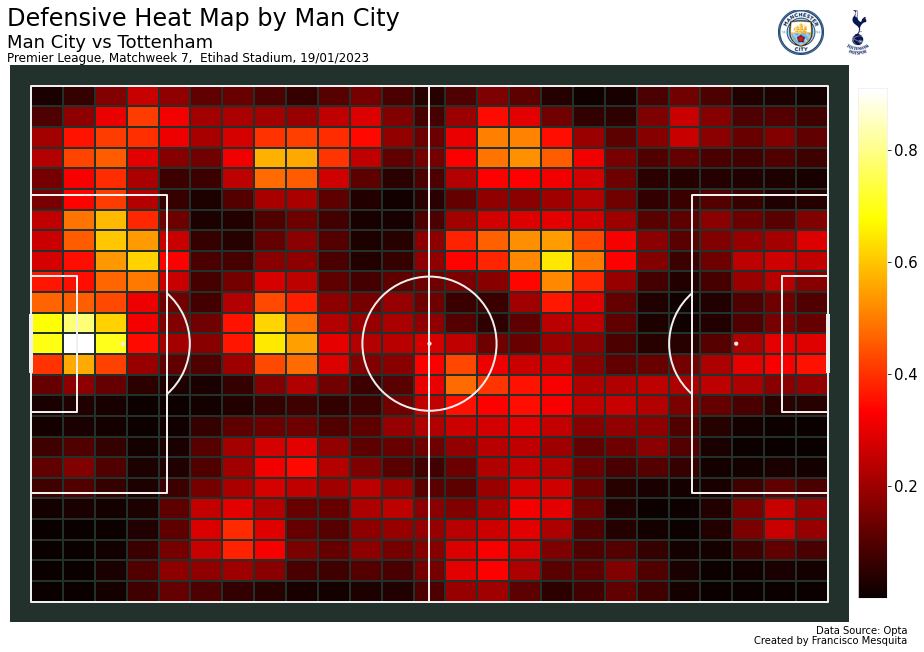

In [28]:
pitch = Pitch(pitch_type = 'opta', line_zorder = 2, pitch_color = '#22312b', line_color = '#efefef')
fig, axs = pitch.grid(endnote_height = 0.03, endnote_space = 0, grid_width = 0.88, left = 0.025,
                      title_height = 0.06, title_space = 0, axis = False, grid_height = 0.86)
fig.set_facecolor('white')

city = df_def[df_def.team_name == data['home']['name']]
#city = df_def[df_def.team_name == data['away']['name']]

# plot heatmap
bin_statistic = pitch.bin_statistic(city.x, city.y, statistic = 'count', bins = (25, 25))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax = axs['pitch'], cmap = 'hot', edgecolors = '#22312b')

# add cbar
ax_cbar = fig.add_axes((0.915, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax = ax_cbar)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color = 'black')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color = 'black')
for label in cbar.ax.get_yticklabels():
    label.set_fontsize(15)

axs['title'].text(-0.03, 1.2, 'Defensive Heat Map by ' + data['home']['name'], 
#axs['title'].text(-0.03, 1.2, 'Defensive Heat Map by ' + data['away']['name'], 
                  va = 'center', ha = 'left', fontsize = 24, color = 'black')
axs['title'].text(-0.03, 0.6, data['home']['name'] + ' vs ' + data['away']['name'], 
                  va = 'center', ha = 'left', fontsize = 18, color = 'black')
axs['title'].text(-0.03, 0.2, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                  va = 'center', ha = 'left', fontsize = 12, color = 'black')    
    
# Home
add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.93, width = 0.07, height = 0.07)
# Away
add_image(Image.open(pAway), fig, 
          left = 0.88, bottom = 0.93, width = 0.07, height = 0.07)

axs['endnote'].text(1.1, .6, 'Data Source: Opta', va = 'center', ha = 'right', color = 'black')
axs['endnote'].text(1.1, .1, 'Created by Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

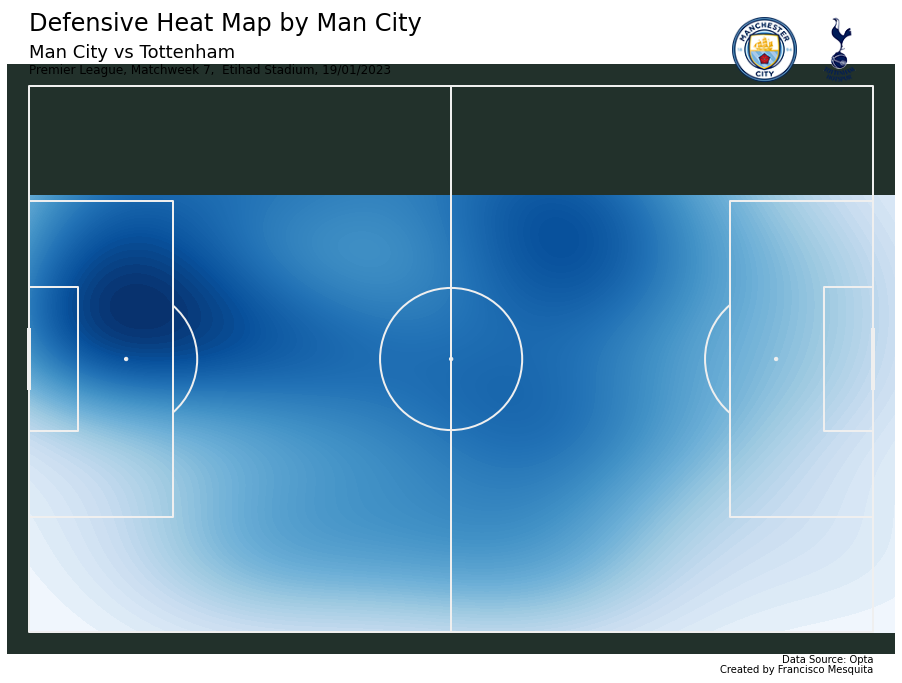

In [29]:
fig, axs = pitch.grid(figheight = 10, title_height = 0.08, endnote_space = 0, title_space = 0,
                      axis = False, grid_height = 0.82, endnote_height = 0.03)
fig.set_facecolor('white')

pitch = Pitch(line_color = '#000009', line_zorder = 1)

city = df_def[df_def.team_name == 'Man City']
#city = df_def[df_def.team_name == data['away']['name']]

kde_HD = pitch.kdeplot(city.x, city.y, ax = axs['pitch'], shade = True, levels = 100, 
                       shade_lowest = True, cut = 4, cmap = 'Blues')

axs['title'].text(0, 0.7, 'Defensive Heat Map by Man City', 
#axs['title'].text(0, 0.7, 'Defensive Heat Map by ' + data['away']['name'],  
                  va = 'center', ha = 'left', fontsize = 24, color = 'black')
axs['title'].text(0, 0.2, data['home']['name'] + ' vs ' + data['away']['name'], 
                  va = 'center', ha = 'left', fontsize = 18, color = 'black')
axs['title'].text(0, -0.1, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                  va = 'center', ha = 'left', fontsize = 12, color = 'black')


axs['endnote'].text(1, 0.8, 'Data Source: Opta', va = 'center', ha = 'right', color = 'black')
axs['endnote'].text(1, 0.3, 'Created by Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

add_image(Image.open(pHome), fig, 
          left = 0.8, bottom = 0.86, width = 0.07, height = 0.09)
add_image(Image.open(pAway), fig, 
          left = 0.88, bottom = 0.86, width = 0.07, height = 0.09)

plt.show()

# Offensive Actions - Shot Map

In [30]:
Opp = 'Chelsea'

MissedShots = df[df.type_displayName == 'MissedShots'].reset_index()
MissedShots['team_name'] = MissedShots.teamId.apply(lambda x: team_dict[x])
MissedShots['player_name'] = MissedShots.playerId.apply(lambda x: player_dict[x])
MissedShots = MissedShots[MissedShots.team_name == 'Man City']
MissedShots_Total = MissedShots[MissedShots.columns[0]].count()
print(str(MissedShots_Total) + ' Missed Shots (Off Target)')

ShotOnPost = df[df.type_displayName == 'ShotOnPost'].reset_index()
ShotOnPost['team_name'] = ShotOnPost.teamId.apply(lambda x: team_dict[x])
ShotOnPost['player_name'] = ShotOnPost.playerId.apply(lambda x: player_dict[x])
ShotOnPost = ShotOnPost[ShotOnPost.team_name == 'Man City']
ShotOnPost_Total = ShotOnPost[ShotOnPost.columns[0]].count()
print(str(ShotOnPost_Total) + ' Shots on Post')

SavedShot = df[df.type_displayName == 'SavedShot'].reset_index()
SavedShot['team_name'] = SavedShot.teamId.apply(lambda x: team_dict[x])
SavedShot['player_name'] = SavedShot.playerId.apply(lambda x: player_dict[x])
SavedShot = SavedShot[SavedShot.team_name == 'Man City']
SavedShot_Total = SavedShot[SavedShot.columns[0]].count()
print(str(SavedShot_Total) + ' Saved Shots')

Missed = df[df.type_displayName.isin(['MissedShots', 'ShotOnPost', 'SavedShot'])]
Missed['team_name'] = Missed.teamId.apply(lambda x: team_dict[x])
Missed['player_name'] = Missed.playerId.apply(lambda x: player_dict[x])
Missed = Missed[Missed.team_name == 'Man City']
Missed_Total = Missed[Missed.columns[0]].count()
print(str(Missed_Total) + ' Total Missed Shots')

Goal = df[df.type_displayName == 'Goal'].reset_index()
Goal['team_name'] = Goal.teamId.apply(lambda x: team_dict[x])
Goal['player_name'] = Goal.playerId.apply(lambda x: player_dict[x])
#OwnGoal = Goal[Goal.team_name == Opp]
#OwnGoal_Total = OwnGoal[OwnGoal.columns[0]].count()
Goal = Goal[Goal.team_name == 'Man City']
Goal_Total = Goal[Goal.columns[0]].count()
print(str(Goal_Total) + ' Goals')
#print(str(OwnGoal_Total) + ' Own Goal')

Shot = df[df.type_displayName.isin(['MissedShots', 'ShotOnPost', 'SavedShot', 'Goal'])]
Shot['team_name'] = Shot.teamId.apply(lambda x: team_dict[x])
Shot['player_name'] = Shot.playerId.apply(lambda x: player_dict[x])
Shot = Shot[Shot.team_name == 'Man City']
Shot_Total = Shot[Shot.columns[0]].count()
print(str(Shot_Total) + ' Total Shots')

5 Missed Shots (Off Target)
0 Shots on Post
7 Saved Shots
12 Total Missed Shots
4 Goals
16 Total Shots


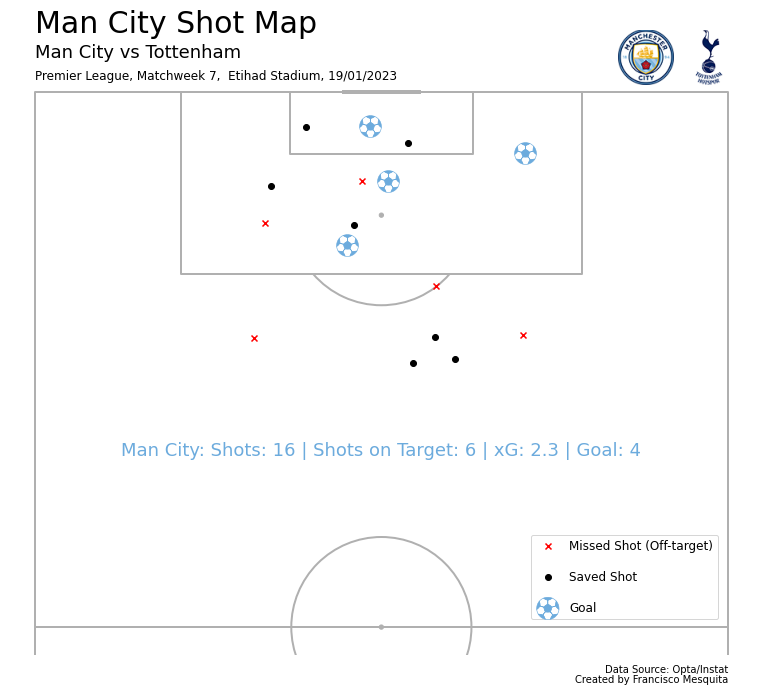

In [31]:
pitch = VerticalPitch(pitch_type = 'opta', half = True)
fig, axs = pitch.grid(figheight = 10, title_height = 0.08, endnote_space = 0, axis = False, 
                      title_space = 0, grid_height = 0.82, endnote_height = 0.05)
fig.set_facecolor("white")

#pitch.scatter(100-OwnGoal.x, OwnGoal.y, edgecolors = 'red', linewidth = 0.6, c = 'white', 
#            marker = 'football', ax = axs['pitch'], zorder = 2, label = 'Own Goal')

pitch.scatter(MissedShots.x, MissedShots.y, c = 'red', edgecolors = 'red',
              marker = 'x', ax = axs['pitch'], zorder = 2, label = 'Missed Shot (Off-target)')

pitch.scatter(SavedShot.x, SavedShot.y, c = 'black', edgecolors = 'black',
              marker = 'o', ax = axs['pitch'], zorder = 2, label = 'Saved Shot')

#pitch.scatter(ShotOnPost.x, ShotOnPost.y, c = 'grey', edgecolors = 'black',
#              marker = 'x', ax = axs['pitch'], zorder = 2, label = 'Shot on Post')

pitch.scatter(Goal.x, Goal.y, edgecolors = cHome, linewidth = 0.6, c = 'white', 
#pitch.scatter(Goal.x, Goal.y, edgecolors = cAway, linewidth = 0.6, c = 'white', 
             marker = 'football', ax = axs['pitch'], zorder = 2, label = 'Goal')

axs['title'].text(0, 0.7, 'Man City Shot Map', va = 'center', ha = 'left', fontsize = 30, color = 'black')
axs['title'].text(0, 0.2, data['home']['name'] + ' vs ' + data['away']['name'], 
                  va = 'center', ha = 'left', fontsize = 18, color = 'black')
axs['title'].text(0, -0.2, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                  va = 'center', ha = 'left', fontsize = 12, color = 'black')

# add a legend and title
legend = axs['pitch'].legend(loc = (0.7,.06), labelspacing = 1.5, fontsize = 12, labelcolor = 'black')

add_image(Image.open(pHome), fig, 
          left = 0.8, bottom = 0.86, width = 0.07, height = 0.09)
add_image(Image.open(pAway), fig, 
          left = 0.88, bottom = 0.86, width = 0.07, height = 0.09)

axs['endnote'].text(1, 0.6, 'Data Source: Opta/Instat', va = 'center', ha = 'right', color = 'black')
axs['endnote'].text(1, 0.3, 'Created by Francisco Mesquita', va = 'center', ha = 'right', color = 'black')


axs['title'].text(0.5, -6.7, "Man City: Shots: 16 | Shots on Target: 6 | xG: 2.3 | Goal: 4", 
                 color = cHome, va = 'center', ha = 'center', fontsize = 18)
#                 color = cAway, va = 'center', ha = 'center', fontsize = 18)

plt.show()

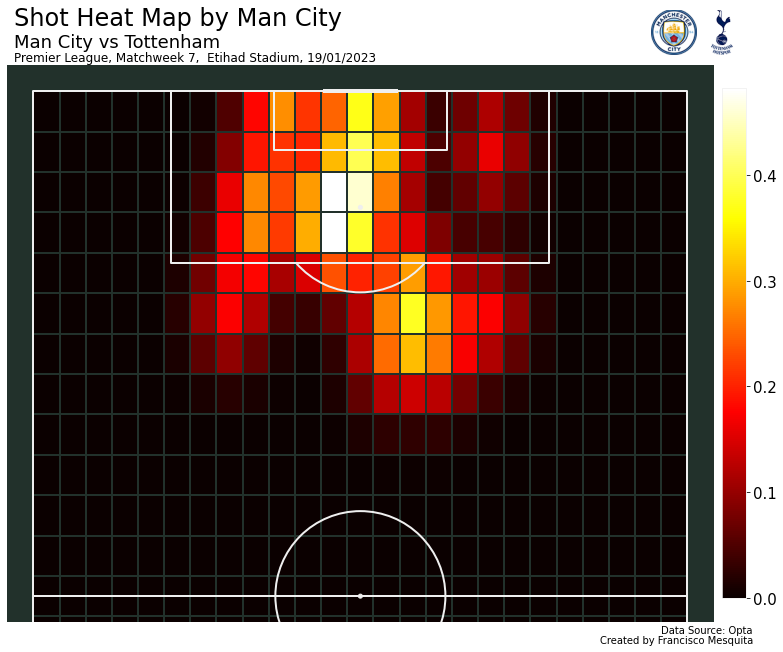

In [32]:
pitch = VerticalPitch(pitch_type = 'opta', line_zorder = 2, pitch_color = '#22312b', line_color = '#efefef', half = True)
fig, axs = pitch.grid(endnote_height = 0.03, endnote_space = 0, grid_width = 0.88, left = 0.025,
                      title_height = 0.06, title_space = 0, axis = False, grid_height = 0.86)
fig.set_facecolor('white')

# plot heatmap
bin_statistic = pitch.bin_statistic(Shot.x, Shot.y, statistic = 'count', bins = (25, 25))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax = axs['pitch'], cmap = 'hot', edgecolors = '#22312b')

# add cbar
ax_cbar = fig.add_axes((0.915, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax = ax_cbar)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color = 'black')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color = 'black')
for label in cbar.ax.get_yticklabels():
    label.set_fontsize(15)

axs['title'].text(-0.03, 1.2, 'Shot Heat Map by ' + data['home']['name'], 
#axs['title'].text(-0.03, 1.2, 'Shot Heat Map by ' + data['away']['name'], 
                  va = 'center', ha = 'left', fontsize = 24, color = 'black')
axs['title'].text(-0.03, 0.6, data['home']['name'] + ' vs ' + data['away']['name'], 
                  va = 'center', ha = 'left', fontsize = 18, color = 'black')
axs['title'].text(-0.03, 0.2, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                  va = 'center', ha = 'left', fontsize = 12, color = 'black')    
    
# Home
add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.93, width = 0.07, height = 0.07)
# Away
add_image(Image.open(pAway), fig, 
          left = 0.88, bottom = 0.93, width = 0.07, height = 0.07)

axs['endnote'].text(1.1, .6, 'Data Source: Opta', va = 'center', ha = 'right', color = 'black')
axs['endnote'].text(1.1, .1, 'Created by Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

# Individual Performances

## Player 1 Riyad Mahrez

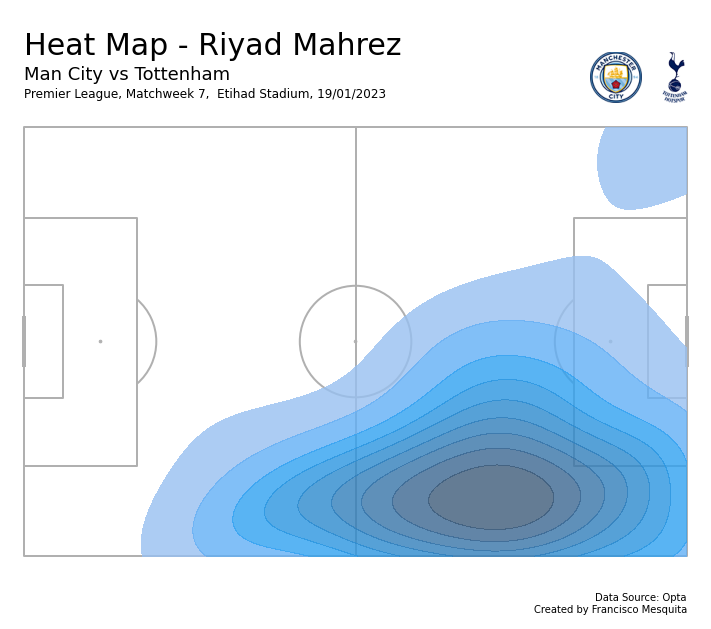

In [33]:
pitch = Pitch(pitch_type = 'opta')
fig, ax = pitch.grid(axis = False)
fig.set_facecolor("white")

player1 = touches_df[touches_df.player_name == 'Riyad Mahrez']

pitch.kdeplot(player1.x, player1.y, shade = True, alpha = 0.8, ax = ax['pitch']) #, color = cHome)

ax['title'].text(0, 0.6, 'Heat Map - Riyad Mahrez', va = 'center', ha = 'left', fontsize=30, color = 'black')
ax['title'].text(0, 0.3, data['home']['name'] + ' vs ' + data['away']['name'], 
                 va = 'center', ha = 'left', fontsize = 18, color = 'black')
ax['title'].text(0, 0.1, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                 va = 'center', ha = 'left', fontsize = 12, color = 'black')

add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.82, width = 0.07, height = 0.09)
add_image(Image.open(pAway), fig, 
          left = 0.9, bottom = 0.82, width = 0.07, height = 0.09)

ax['endnote'].text(1, 0.6, 'Data Source: Opta', va = 'center', ha = 'right', color = 'black')
ax['endnote'].text(1, 0.3, 'Created by Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

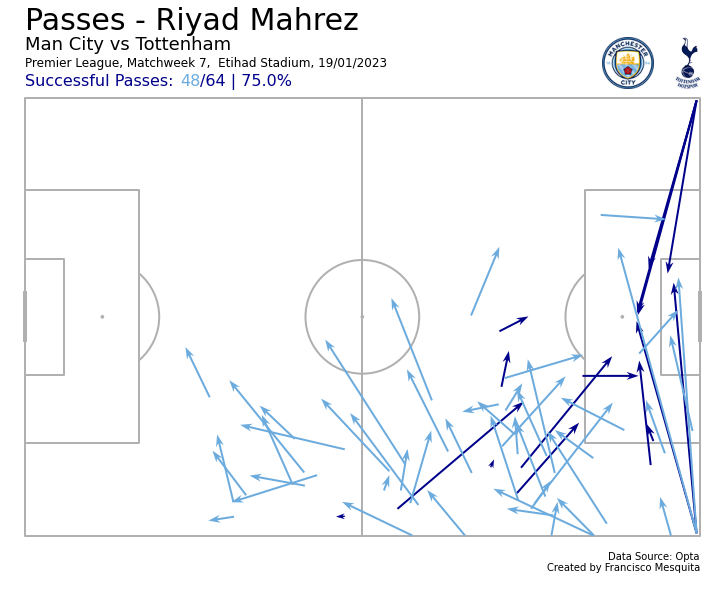

In [34]:
pitch = Pitch(pitch_type = 'opta')
fig, ax = pitch.grid(figheight = 8, title_height = 0.08, endnote_space = 0, axis = False, 
                      title_space = 0, grid_height = 0.82, endnote_height = 0.05)
fig.set_facecolor("white")

home = pass_data[pass_data.team_name == data['home']['name']]
home_succ = home[home.outcomeType_displayName == 'Successful']
home_fail = home[home.outcomeType_displayName == 'Unsuccessful']
#away = pass_data[pass_data.team_name == data['away']['name']]
#away_succ = away[away.outcomeType_displayName == 'Successful']
#away_fail = away[away.outcomeType_displayName == 'Unsuccessful']

player1_succ = home_succ[home_succ.player_name == 'Riyad Mahrez']
player1_fail = home_fail[home_fail.player_name == 'Riyad Mahrez']
#player1_succ = away_succ[away_succ.player_name == 'Riyad Mahrez']
#player1_fail = away_fail[away_fail.player_name == 'Riyad Mahrez']

player1_succ_total = player1_succ[player1_succ.columns[0]].count() #number of successful passes
player1_fail_total = player1_fail[player1_fail.columns[0]].count() #number of unsuccessful passes
player1_total = player1_succ_total + player1_fail_total #number of total passes
player1_total_perc = round(100 * player1_succ_total/player1_total, 0)

pitch.arrows(player1_fail.x, player1_fail.y, player1_fail.endX, player1_fail.endY,  ax = ax['pitch'], color = '#00008b', 
             width = 2, headwidth = 4, headlength = 6)
pitch.arrows(player1_succ.x, player1_succ.y, player1_succ.endX, player1_succ.endY,  ax = ax['pitch'], color = cHome, 
             width = 2, headwidth = 4, headlength = 6)

ax['title'].text(0, 1.3, 'Passes - Riyad Mahrez', va = 'center', ha = 'left', fontsize = 30, color = 'black')
ax['title'].text(0, 0.8, data['home']['name'] + ' vs ' + data['away']['name'], 
                 va = 'center', ha = 'left', fontsize = 18, color = 'black')
ax['title'].text(0, 0.4, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                 va = 'center', ha = 'left', fontsize = 12, color = 'black')
ax['title'].text(0, 0.0, 'Successful Passes: ', va = 'center', ha = 'left', fontsize = 16, color = '#00008b')
ax['title'].text(0.23, 0.0, str(player1_succ_total), va = 'center', ha = 'left', fontsize = 16, color = cHome)
ax['title'].text(0.26, 0.0, '/' + str(player1_total) + ' | ' + str(player1_total_perc) + '%', 
                 va = 'center', ha = 'left', fontsize = 16, color = '#00008b')
#ax['title'].text(0, 0.0, 'Successful Passes: ' + str(player1_succ_total) + '/' + str(player1_total) + ' | ' 
#                 + str(player1_total_perc) + '%', va = 'center', ha = 'left', fontsize = 16, color = 'pink')

add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.88, width = 0.07, height = 0.09)
add_image(Image.open(pAway), fig, 
          left = 0.9, bottom = 0.88, width = 0.07, height = 0.09)

ax['endnote'].text(1, 0.9, 'Data Source: Opta', va = 'center', ha = 'right', color = 'black')
ax['endnote'].text(1, 0.5, 'Created by Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

In [35]:
player1_MissedShots = MissedShots[MissedShots.player_name == 'Riyad Mahrez']
player1_MissedShots_Total = player1_MissedShots[player1_MissedShots.columns[0]].count()
print(str(player1_MissedShots_Total) + ' Missed Shots (Off Target)')

player1_ShotOnPost = ShotOnPost[ShotOnPost.player_name == 'Riyad Mahrez']
player1_ShotOnPost_Total = player1_ShotOnPost[player1_ShotOnPost.columns[0]].count()
print(str(player1_ShotOnPost_Total) + ' Shots on Post')

player1_SavedShot = SavedShot[SavedShot.player_name == 'Riyad Mahrez']
player1_SavedShot_Total = player1_SavedShot[player1_SavedShot.columns[0]].count()
print(str(player1_SavedShot_Total) + ' Saved Shots')

player1_Missed = Missed[Missed.player_name == 'Riyad Mahrez']
player1_Missed_Total = player1_Missed[player1_Missed.columns[0]].count()
print(str(player1_Missed_Total) + ' Total Missed Shots')

player1_Goal = Goal[Goal.player_name == 'Riyad Mahrez']
player1_Goal_Total = player1_Goal[player1_Goal.columns[0]].count()
print(str(player1_Goal_Total) + ' Goals')

1 Missed Shots (Off Target)
0 Shots on Post
1 Saved Shots
2 Total Missed Shots
2 Goals


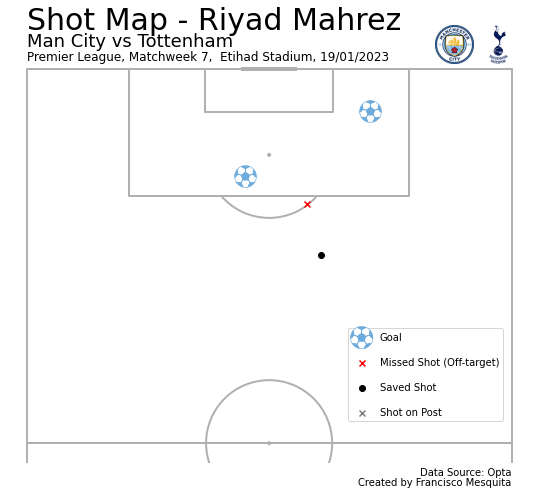

In [36]:
pitch = VerticalPitch(pitch_type = 'opta', half = True)
fig, axs = pitch.grid(figheight = 7, title_height = 0.08, endnote_space = 0, axis = False, 
                      title_space = 0, grid_height = 0.82, endnote_height = 0.05)
fig.set_facecolor("white")


pitch.scatter(player1_Goal.x, player1_Goal.y, edgecolors = cHome, linewidth = 0.6, c = 'white', 
             marker = 'football', ax = axs['pitch'], zorder = 2, label = 'Goal')

pitch.scatter(player1_MissedShots.x, player1_MissedShots.y, c = 'red', edgecolors = 'red',
              marker = 'x', ax = axs['pitch'], zorder = 2, label = 'Missed Shot (Off-target)')

pitch.scatter(player1_SavedShot.x, player1_SavedShot.y, c = 'black', edgecolors = 'black',
              marker = 'o', ax = axs['pitch'], zorder = 2, label = 'Saved Shot')

pitch.scatter(player1_ShotOnPost.x, player1_ShotOnPost.y, c = 'grey', edgecolors = 'black',
              marker = 'x', ax = axs['pitch'], zorder = 2, label = 'Shot on Post')


axs['title'].text(0, 0.7, 'Shot Map - Riyad Mahrez', va = 'center', ha = 'left', fontsize = 30, color = 'black')
axs['title'].text(0, 0.2, data['home']['name'] + ' vs ' + data['away']['name'], 
                  va = 'center', ha = 'left', fontsize = 18, color = 'black')
axs['title'].text(0, -0.2, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                  va = 'center', ha = 'left', fontsize = 12, color = 'black')

# add a legend and title
legend = axs['pitch'].legend(loc = (0.65,.1), labelspacing = 1.5, fontsize = 10, labelcolor = 'black')

add_image(Image.open(pHome), fig, 
          left = 0.8, bottom = 0.86, width = 0.07, height = 0.09)
add_image(Image.open(pAway), fig, 
          left = 0.88, bottom = 0.86, width = 0.07, height = 0.09)

axs['endnote'].text(1, 0.6, 'Data Source: Opta', va = 'center', ha = 'right', color = 'black')
axs['endnote'].text(1, 0.2, 'Created by Francisco Mesquita', va = 'center', ha = 'right', color = 'black')


#axs['title'].text(0.5, -6.7, "Man City: Shots: 18 | Shots on Target: 9 | xG: 1.8 | Goal: 3", 
#                 color = cHome, va = 'center', ha = 'center', fontsize = 18)

plt.show()

## Player 2 Rodri

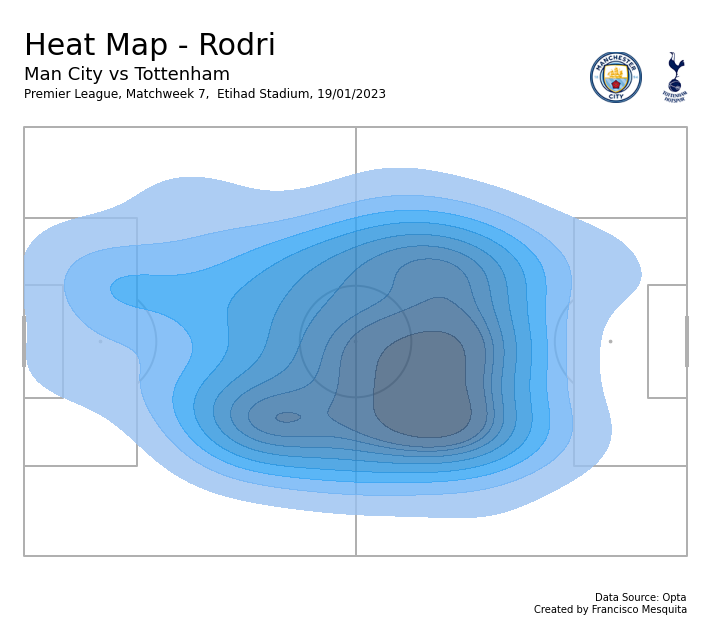

In [37]:
pitch = Pitch(pitch_type ='opta')
fig, ax = pitch.grid(axis = False)
fig.set_facecolor("white")

player2 = touches_df[touches_df.player_name == 'Rodri']

pitch.kdeplot(player2.x, player2.y, shade = True, alpha = 0.8, ax = ax['pitch']) #, color = cHome)

ax['title'].text(0, 0.6, 'Heat Map - Rodri', va = 'center', ha = 'left', fontsize = 30, color = 'black')
ax['title'].text(0, 0.3, data['home']['name'] + ' vs ' + data['away']['name'], 
                 va = 'center', ha = 'left', fontsize = 18, color = 'black')
ax['title'].text(0, 0.1, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                 va = 'center', ha = 'left', fontsize = 12, color = 'black')

add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.82, width = 0.07, height = 0.09)
add_image(Image.open(pAway), fig, 
          left = 0.9, bottom = 0.82, width = 0.07, height = 0.09)

ax['endnote'].text(1, 0.6, 'Data Source: Opta', va = 'center', ha = 'right', color = 'black')
ax['endnote'].text(1, 0.3, 'Created by Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

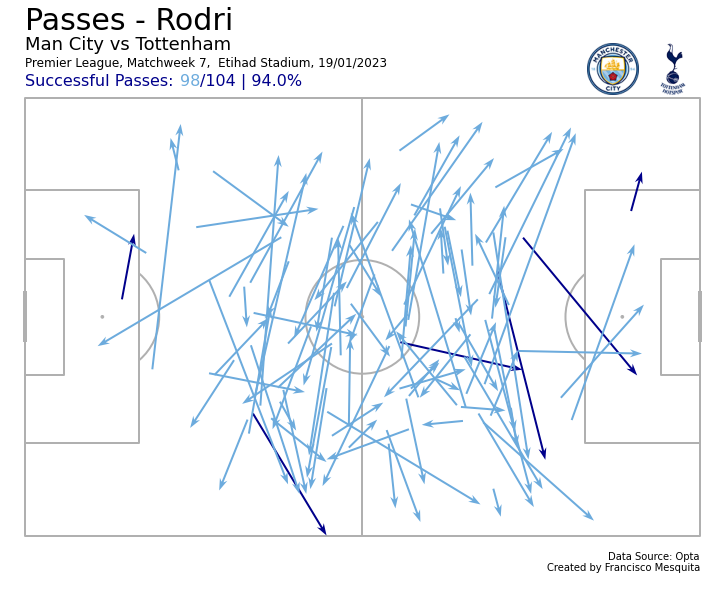

In [38]:
pitch = Pitch(pitch_type = 'opta')
fig, ax = pitch.grid(figheight = 8, title_height = 0.08, endnote_space = 0, axis = False, 
                      title_space = 0, grid_height = 0.82, endnote_height = 0.05)
fig.set_facecolor("white")

city = pass_data[pass_data.team_name == data['home']['name']]
#city = pass_data[pass_data.team_name == data['away']['name']]

city_succ = city[city.outcomeType_displayName == 'Successful']
city_fail = city[city.outcomeType_displayName == 'Unsuccessful']

player2_succ = city_succ[city_succ.player_name == 'Rodri']
player2_fail = city_fail[city_fail.player_name == 'Rodri']

player2_succ_total = player2_succ[player2_succ.columns[0]].count() #number of successful passes
player2_fail_total = player2_fail[player2_fail.columns[0]].count() #number of unsuccessful passes
player2_total = player2_succ_total + player2_fail_total #number of total passes
player2_total_perc = round(100 * player2_succ_total/player2_total, 0)

pitch.arrows(player2_fail.x, player2_fail.y, player2_fail.endX, player2_fail.endY,  ax = ax['pitch'], color = '#00008b', 
             width = 2, headwidth = 4, headlength = 6)
pitch.arrows(player2_succ.x, player2_succ.y, player2_succ.endX, player2_succ.endY,  ax = ax['pitch'], color = cHome, 
             width = 2, headwidth = 4, headlength = 6)

ax['title'].text(0, 1.3, 'Passes - Rodri', va = 'center', ha = 'left', fontsize = 30, color = 'black')
ax['title'].text(0, 0.8, data['home']['name'] + ' vs ' + data['away']['name'], 
                 va = 'center', ha = 'left', fontsize = 18, color = 'black')
ax['title'].text(0, 0.4, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                 va = 'center', ha = 'left', fontsize = 12, color = 'black')
ax['title'].text(0, 0.0, 'Successful Passes: ', va = 'center', ha = 'left', fontsize = 16, color = '#00008b')
ax['title'].text(0.23, 0.0, str(player2_succ_total), va = 'center', ha = 'left', fontsize = 16, color = cHome)
ax['title'].text(0.26, 0.0, '/' + str(player2_total) + ' | ' + str(player2_total_perc) + '%', 
                 va = 'center', ha = 'left', fontsize = 16, color = '#00008b')
#ax['title'].text(0, 0.0, 'Successful Passes: ' + str(player1_succ_total) + '/' + str(player1_total) + ' | ' 
#                 + str(player1_total_perc) + '%', va = 'center', ha = 'left', fontsize = 16, color = 'pink')

add_image(Image.open(pHome), fig, 
          left = 0.8, bottom = 0.87, width = 0.07, height = 0.09)
add_image(Image.open(pAway), fig, 
          left = 0.88, bottom = 0.87, width = 0.07, height = 0.09)

ax['endnote'].text(1, 0.9, 'Data Source: Opta', va = 'center', ha = 'right', color = 'black')
ax['endnote'].text(1, 0.5, 'Created by Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

In [39]:
player2_Clear = Clearance[Clearance.player_name == 'Rodri']
player2_Clear_Total = player2_Clear[player2_Clear.columns[0]].count()
print(str(player2_Clear_Total) + ' Clearances')

player2_Intercep = Interception[Interception.player_name == 'Rodri']
player2_Intercep_Total = player2_Intercep[player2_Intercep.columns[0]].count()
print(str(player2_Intercep_Total) + ' Interceptions')

player2_BlockPass = BlockedPass[BlockedPass.player_name == 'Rodri']
player2_BlockPass_Total = player2_BlockPass[player2_BlockPass.columns[0]].count()
print(str(player2_BlockPass_Total) + ' Blocked Passes')

player2_Tackle = Tackle[Tackle.player_name == 'Rodri']
player2_Tackle_Total = player2_Tackle[player2_Tackle.columns[0]].count()
print(str(player2_Tackle_Total) + ' Tackles')

player2_BallRecover = BallRecovery[BallRecovery.player_name == 'Rodri']
player2_BallRecover_Total = player2_BallRecover[player2_BallRecover.columns[0]].count()
print(str(player2_BallRecover_Total) + ' Ball Recoveries')

AerialWon
player2_AerialWon = AerialWon[AerialWon.player_name == 'Rodri']
player2_AerialWon_Total = player2_AerialWon[player2_AerialWon.columns[0]].count()
print(str(player2_AerialWon_Total) + ' Aerial Duels Won')

1 Clearances
1 Interceptions
1 Blocked Passes
2 Tackles
5 Ball Recoveries
2 Aerial Duels Won


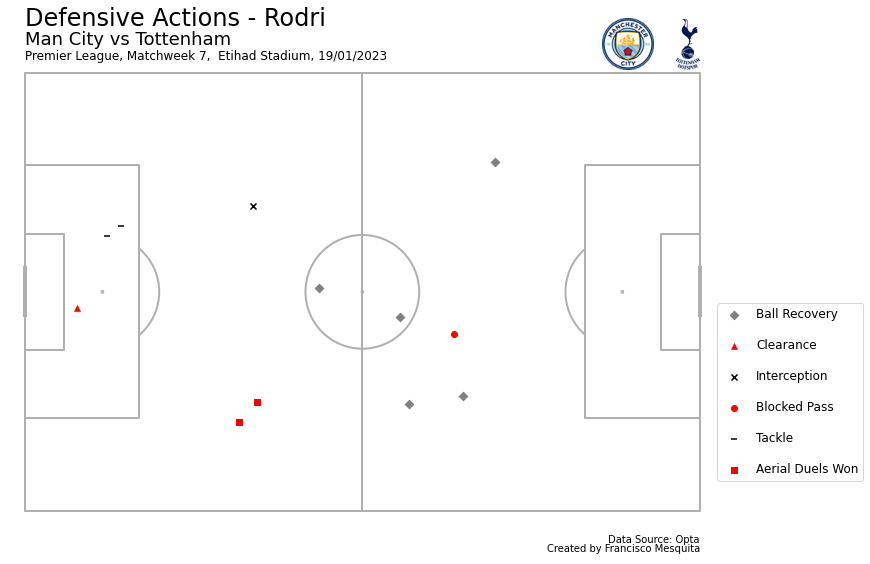

In [40]:
pitch = Pitch(pitch_type = 'opta')
fig, axs = pitch.grid(figheight = 8, title_height = 0.08, endnote_space = 0, axis = False, 
                      title_space = 0, grid_height = 0.82, endnote_height = 0.05)
fig.set_facecolor("white")

pitch.scatter(player2_BallRecover.x, player2_BallRecover.y, c = 'grey', edgecolors = 'grey',
              marker = 'D', ax = axs['pitch'], zorder = 2, label = 'Ball Recovery')

pitch.scatter(player2_Clear.x, player2_Clear.y, edgecolors = 'red', linewidth = 0.6, c = 'red', 
             marker = '^', ax = axs['pitch'], zorder = 2, label = 'Clearance')

pitch.scatter(player2_Intercep.x, player2_Intercep.y, c = 'black', edgecolors = 'black',
              marker = 'x', ax = axs['pitch'], zorder = 2, label = 'Interception')

pitch.scatter(player2_BlockPass.x, player2_BlockPass.y, c = 'red', edgecolors = 'red',
              marker = 'o', ax = axs['pitch'], zorder = 2, label = 'Blocked Pass')

pitch.scatter(player2_Tackle.x, player2_Tackle.y, c = 'black', edgecolors = 'black',
              marker = '_', ax = axs['pitch'], zorder = 2, label = 'Tackle')

pitch.scatter(player2_AerialWon.x, player2_AerialWon.y, c = 'red', edgecolors = 'red',
              marker = 's', ax = axs['pitch'], zorder = 2, label = 'Aerial Duels Won')

axs['title'].text(0, 0.8, 'Defensive Actions - Rodri', va = 'center', ha = 'left', fontsize = 24, color = 'black')
axs['title'].text(0, 0.35, data['home']['name'] + ' vs ' + data['away']['name'], 
                  va = 'center', ha = 'left', fontsize = 18, color = 'black')
axs['title'].text(0, 0., comp + ', ' + stage + ', ' + venue + ', ' + date, 
                  va = 'center', ha = 'left', fontsize = 12, color = 'black')

# add a legend and title
legend = axs['pitch'].legend(loc = (1.,.1), labelspacing = 1.5, fontsize = 12, labelcolor = 'black')

add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.87, width = 0.07, height = 0.09)
add_image(Image.open(pAway), fig, 
          left = 0.9, bottom = 0.87, width = 0.07, height = 0.09)

axs['endnote'].text(1, 0.6, 'Data Source: Opta', va = 'center', ha = 'right', color = 'black')
axs['endnote'].text(1, 0.3, 'Created by Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

## Player 3 Erling Haarland

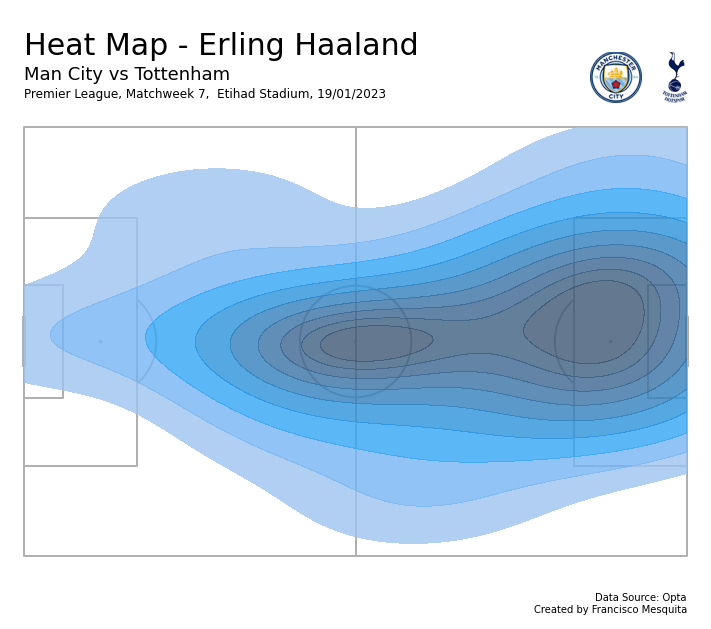

In [41]:
pitch = Pitch(pitch_type ='opta')
fig, ax = pitch.grid(axis = False)
fig.set_facecolor("white")

player3 = touches_df[touches_df.player_name == 'Erling Haaland']

pitch.kdeplot(player3.x, player3.y, shade = True, alpha = 0.8, ax = ax['pitch']) #, color = cHome)

ax['title'].text(0, 0.6, 'Heat Map - Erling Haaland', va = 'center', ha = 'left', fontsize = 30, color = 'black')
ax['title'].text(0, 0.3, data['home']['name'] + ' vs ' + data['away']['name'], 
                 va = 'center', ha = 'left', fontsize = 18, color = 'black')
ax['title'].text(0, 0.1, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                 va = 'center', ha = 'left', fontsize = 12, color = 'black')

add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.82, width = 0.07, height = 0.09)
add_image(Image.open(pAway), fig, 
          left = 0.9, bottom = 0.82, width = 0.07, height = 0.09)

ax['endnote'].text(1, 0.6, 'Data Source: Opta', va = 'center', ha = 'right', color = 'black')
ax['endnote'].text(1, 0.3, 'Created by Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

In [42]:
player3_MissedShots = MissedShots[MissedShots.player_name == 'Erling Haaland']
player3_MissedShots_Total = player3_MissedShots[player3_MissedShots.columns[0]].count()
print(str(player3_MissedShots_Total) + ' Missed Shots (Off Target)')

player3_ShotOnPost = ShotOnPost[ShotOnPost.player_name == 'Erling Haaland']
player3_ShotOnPost_Total = player3_ShotOnPost[player3_ShotOnPost.columns[0]].count()
print(str(player3_ShotOnPost_Total) + ' Shots on Post')

player3_SavedShot = SavedShot[SavedShot.player_name == 'Erling Haaland']
player3_SavedShot_Total = player3_SavedShot[player3_SavedShot.columns[0]].count()
print(str(player3_SavedShot_Total) + ' Saved Shots')

player3_Missed = Missed[Missed.player_name == 'Erling Haaland']
player3_Missed_Total = player3_Missed[player3_Missed.columns[0]].count()
print(str(player3_Missed_Total) + ' Total Missed Shots')

player3_Goal = Goal[Goal.player_name == 'Erling Haaland']
player3_Goal_Total = player3_Goal[player3_Goal.columns[0]].count()
print(str(player3_Goal_Total) + ' Goals')

1 Missed Shots (Off Target)
0 Shots on Post
1 Saved Shots
2 Total Missed Shots
1 Goals


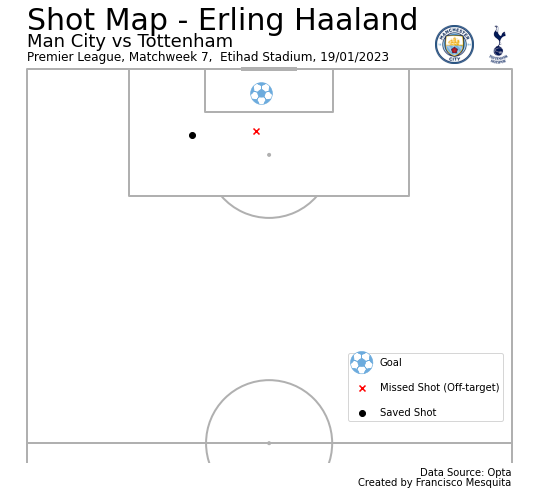

In [43]:
pitch = VerticalPitch(pitch_type = 'opta', half = True)
fig, axs = pitch.grid(figheight = 7, title_height = 0.08, endnote_space = 0, axis = False, 
                      title_space = 0, grid_height = 0.82, endnote_height = 0.05)
fig.set_facecolor("white")


pitch.scatter(player3_Goal.x, player3_Goal.y, edgecolors = cHome, linewidth = 0.6, c = 'white', 
             marker = 'football', ax = axs['pitch'], zorder = 2, label = 'Goal')

pitch.scatter(player3_MissedShots.x, player3_MissedShots.y, c = 'red', edgecolors = 'red',
              marker = 'x', ax = axs['pitch'], zorder = 2, label = 'Missed Shot (Off-target)')

pitch.scatter(player3_SavedShot.x, player3_SavedShot.y, c = 'black', edgecolors = 'black',
              marker = 'o', ax = axs['pitch'], zorder = 2, label = 'Saved Shot')

#pitch.scatter(player3_ShotOnPost.x, player3_ShotOnPost.y, c = 'grey', edgecolors = 'black',
#              marker = 'x', ax = axs['pitch'], zorder = 2, label = 'Shot on Post')


axs['title'].text(0, 0.7, 'Shot Map - Erling Haaland', va = 'center', ha = 'left', fontsize = 30, color = 'black')
axs['title'].text(0, 0.2, data['home']['name'] + ' vs ' + data['away']['name'], 
                  va = 'center', ha = 'left', fontsize = 18, color = 'black')
axs['title'].text(0, -0.2, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                  va = 'center', ha = 'left', fontsize = 12, color = 'black')

# add a legend and title
legend = axs['pitch'].legend(loc = (0.65,.1), labelspacing = 1.5, fontsize = 10, labelcolor = 'black')

add_image(Image.open(pHome), fig, 
          left = 0.8, bottom = 0.86, width = 0.07, height = 0.09)
add_image(Image.open(pAway), fig, 
          left = 0.88, bottom = 0.86, width = 0.07, height = 0.09)

axs['endnote'].text(1, 0.6, 'Data Source: Opta', va = 'center', ha = 'right', color = 'black')
axs['endnote'].text(1, 0.2, 'Created by Francisco Mesquita', va = 'center', ha = 'right', color = 'black')


#axs['title'].text(0.5, -6.7, "Man City: Shots: 18 | Shots on Target: 9 | xG: 1.8 | Goal: 3", 
#                 color = cHome, va = 'center', ha = 'center', fontsize = 18)

plt.show()

# Understat

In [44]:
# Setting dimensions, colour, orientation of football pitch
def football_pitch(x_min=0, x_max=105,
               y_min=0, y_max=68,
               pitch_color="#f0f0f0",
               line_color='black',
               line_thickness=1.5,
               point_size=20,
               orientation="horizontal",
               aspect="full",
               axis='off',
               ax=None
               ):

    if not ax:
        raise TypeError("This function is intended to be used with an existing fig and ax in order to allow flexibility in plotting of various sizes and in subplots.")


    if orientation.lower().startswith("h"):
        first = 0
        second = 1
        arc_angle = 0

        if aspect == "half":
            ax.set_xlim(x_max / 2, x_max + 5)

    elif orientation.lower().startswith("v"):
        first = 1
        second = 0
        arc_angle = 90

        if aspect == "half":
            ax.set_ylim(x_max / 2, x_max + 5)

    
    else:
        raise NameError("You must choose one of horizontal or vertical")
    
    ax.axis(axis)

    rect = plt.Rectangle((x_min, y_min),
                         x_max, y_max,
                         facecolor=pitch_color,
                         edgecolor="none",
                         zorder=-2)

    ax.add_artist(rect)

    x_conversion = x_max / 100
    y_conversion = y_max / 100

    pitch_x = [0,5.8,11.5,17,50,83,88.5,94.2,100] # x dimension markings
    pitch_x = [x * x_conversion for x in pitch_x]

    pitch_y = [0, 21.1, 36.6, 50, 63.2, 78.9, 100] # y dimension markings
    pitch_y = [x * y_conversion for x in pitch_y]

    goal_y = [45.2, 54.8] # goal posts
    goal_y = [x * y_conversion for x in goal_y]

    # side and goal lines
    lx1 = [x_min, x_max, x_max, x_min, x_min]
    ly1 = [y_min, y_min, y_max, y_max, y_min]

    # outer box
    lx2 = [x_max, pitch_x[5], pitch_x[5], x_max]
    ly2 = [pitch_y[1], pitch_y[1], pitch_y[5], pitch_y[5]]

    lx3 = [0, pitch_x[3], pitch_x[3], 0]
    ly3 = [pitch_y[1], pitch_y[1], pitch_y[5], pitch_y[5]]

    # goals
    lx4 = [x_max, x_max+2, x_max+2, x_max]
    ly4 = [goal_y[0], goal_y[0], goal_y[1], goal_y[1]]

    lx5 = [0, -2, -2, 0]
    ly5 = [goal_y[0], goal_y[0], goal_y[1], goal_y[1]]

    # 6 yard box
    lx6 = [x_max, pitch_x[7], pitch_x[7], x_max]
    ly6 = [pitch_y[2],pitch_y[2], pitch_y[4], pitch_y[4]]

    lx7 = [0, pitch_x[1], pitch_x[1], 0]
    ly7 = [pitch_y[2],pitch_y[2], pitch_y[4], pitch_y[4]]


    # Halfline, penalty spots, and kickoff spot
    lx8 = [pitch_x[4], pitch_x[4]]
    ly8 = [0, y_max]

    lines = [
        [lx1, ly1],
        [lx2, ly2],
        [lx3, ly3],
        [lx4, ly4],
        [lx5, ly5],
        [lx6, ly6],
        [lx7, ly7],
        [lx8, ly8],
        ]

    points = [
        [pitch_x[6], pitch_y[3]],
        [pitch_x[2], pitch_y[3]],
        [pitch_x[4], pitch_y[3]]
        ]

    circle_points = [pitch_x[4], pitch_y[3]]
    arc_points1 = [pitch_x[6], pitch_y[3]]
    arc_points2 = [pitch_x[2], pitch_y[3]]


    for line in lines:
        ax.plot(line[first], line[second],
                color=line_color,
                lw=line_thickness,
                zorder=-1)

    for point in points:
        ax.scatter(point[first], point[second],
                   color=line_color,
                   s=point_size,
                   zorder=-1)

    circle = plt.Circle((circle_points[first], circle_points[second]),
                        x_max * 0.088,
                        lw=line_thickness,
                        color=line_color,
                        fill=False,
                        zorder=-1)

    ax.add_artist(circle)

    arc1 = Arc((arc_points1[first], arc_points1[second]),
               height=x_max * 0.088 * 2,
               width=x_max * 0.088 * 2,
               angle=arc_angle,
               theta1=128.75,
               theta2=231.25,
               color=line_color,
               lw=line_thickness,
               zorder=-1)

    ax.add_artist(arc1)

    arc2 = Arc((arc_points2[first], arc_points2[second]),
               height=x_max * 0.088 * 2,
               width=x_max * 0.088 * 2,
               angle=arc_angle,
               theta1=308.75,
               theta2=51.25,
               color=line_color,
               lw=line_thickness,
               zorder=-1)

    ax.add_artist(arc2)

    ax.set_aspect("equal")

    return ax

In [45]:
# Entering Real Sociedad vs Barcelona match link
link = "https://understat.com/match/18267"
res = requests.get(link)
soup = BeautifulSoup(res.content,'lxml')
scripts = soup.find_all('script')
# Get the shotsData, it's the second script executed in order
strings = scripts[1].string 
# Getting rid of unnecessary characters from json data
ind_start = strings.index("('")+2 
ind_end = strings.index("')") 
json_data = strings[ind_start:ind_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')
data = json.loads(json_data)

In [46]:
df_h = pd.DataFrame(data['h'])
df_a = pd.DataFrame(data['a'])
df = df_h.append(df_a)

# Changing the data types 
df['xG'] = df['xG'].astype('float64')
df['X'] = df['X'].astype('float64')
df['Y'] = df['Y'].astype('float64')

# Adjusting the measurements 
df['X'] = (df['X']/100)*105*100
df['Y'] = (df['Y']/100)*68*100

# Dividing the df between away and home again
df_h = pd.DataFrame(df[df['h_a']=='h'])
df_a = pd.DataFrame(df[df['h_a']=='a'])

# xG for each team
# Sociedad
total_shots_h = df_h[df_h.columns[0]].count()
xGcum_h = np.round(max(np.cumsum(df_h['xG'])),3)
xG_per_shot_h = np.round(max(np.cumsum(df_h['xG']))/(df_h[df_h.columns[0]].count()),3)
goal_h = df_h[df_h['result']=='Goal']
goal_h = goal_h[goal_h.columns[0]].count()
h_team = df['h_team'].iloc[0]

# Barcelona 
# xG for each team
total_shots_a = df_a[df_a.columns[0]].count().tolist()
xGcum_a = np.round(max(np.cumsum(df_a['xG'])),3).tolist()
xG_per_shot_a = np.round(max(np.cumsum(df_a['xG']))/(df_a[df_a.columns[0]].count()),3).tolist()
goal_a = df_a[df_a['result']=='Goal']
goal_a = goal_a[goal_a.columns[0]].count().tolist()
a_team = df['a_team'].iloc[0]

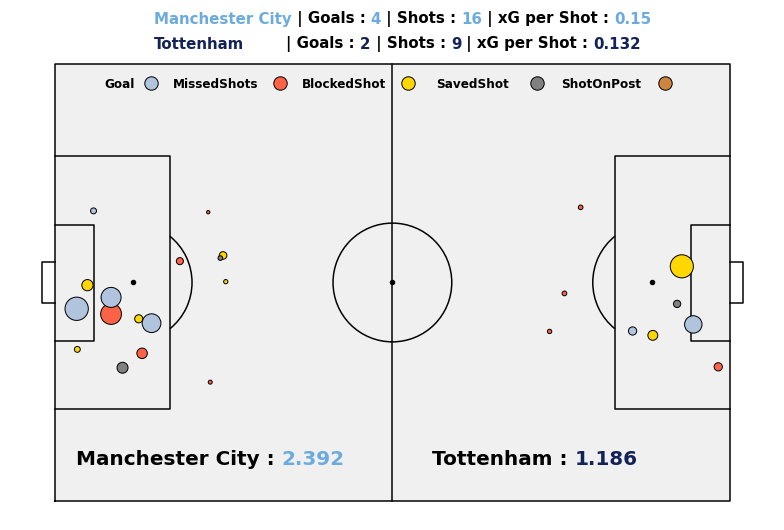

In [47]:
fig, ax = plt.subplots(figsize=(11, 7))
#Drawing a full pitch horizontally
football_pitch(orientation="horizontal",aspect="full",line_color="black",ax=ax)

# Barcelona away team 
z_a = df_a['xG'].tolist()
z1 = [1000 * i for i in z_a] # This is to scale the "xG" values for plotting
colors = {'Goal':'lightsteelblue', 'MissedShots':'tomato', 'BlockedShot':'gold', 'SavedShot':'gray', 'ShotOnPost':'peru'}
## markers = {'Goal':'Star', 'MissedShots':'X', 'BlockedShot':'O', 'SavedShot':'V', 'ShotOnPost':'S'}
plt.scatter(y=df_a["Y"],x=df_a["X"],s=z1, marker='o',color=df_a['result'].map(colors),edgecolors="black")
plt.tight_layout()

# Real Sociedad  
z_h = df_h['xG'].tolist()
z2 = [1000 * i for i in z_h] # This is to scale the "xG" values for plotting
colors = {'Goal':'lightsteelblue', 'MissedShots':'tomato', 'BlockedShot':'gold', 'SavedShot':'gray', 'ShotOnPost':'peru'}
## markers = {'Goal':'Star', 'MissedShots':'X', 'BlockedShot':'O', 'SavedShot':'V', 'ShotOnPost':'S'}
plt.scatter(y=65-(df_h["Y"]),x=105-(df_h["X"]),s=z2, marker='o',color=df_h['result'].map(colors),edgecolors="black")
plt.tight_layout()

# text
# Sociedad
fig_text(0.199,1.04, s="<{}> | Goals : <{}> | Shots : <{}> | xG per Shot : <{}> ".format(h_team,goal_h,total_shots_h,xG_per_shot_h), fontsize = 15, fontweight = "bold",highlight_textprops=[{"color": cHome}, {"color": cHome}, {"color": cHome},{"color": cHome}])

# Barcelona
fig_text(0.199,.99, s="<{}>        | Goals : <{}> | Shots : <{}> | xG per Shot : <{}> ".format(a_team,goal_a,total_shots_a,xG_per_shot_a), fontsize = 15, fontweight = "bold",highlight_textprops=[{"color": cAway}, {"color": cAway}, {"color": cAway},{"color": cAway}])

# xG per team
fig_text(0.1,.17, s="{} : <{}> ".format(h_team,xGcum_h), fontsize = 20, fontweight = "bold",highlight_textprops=[{"color": cHome}])
fig_text(0.55,.17, s="{} : <{}> ".format(a_team,xGcum_a), fontsize = 20, fontweight = "bold",highlight_textprops=[{"color": cAway}])

# Scatter plot for goals, blocked shots, missed shots
plt.scatter(15,65,s=180, edgecolor="black",color='lightsteelblue')
plt.scatter(35,65,s=180, edgecolor="black",color='tomato')
plt.scatter(55,65,s=180, edgecolor="black",color='gold')
plt.scatter(75,65,s=180, edgecolor="black",color='gray')
plt.scatter(95,65,s=180, edgecolor="black",color='peru')
xx = [10,25,45,65,85]
yy = [65,65,65,65,65]
xx_yy = ['Goal', 'MissedShots', 'BlockedShot', 'SavedShot', 'ShotOnPost']
for i in range(len(xx)):
    plt.text(xx[i], yy[i], xx_yy[i], fontsize=12, color="black",ha="center", va="center",fontweight='bold')